In [1]:
## 딥러닝 분류 폐암

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../dataset/ThoraricSurgery.csv') 
df

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62,0.10
0,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
1,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
2,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
3,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
4,18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
465,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
466,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
467,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [3]:
dataset = df.values
x = dataset[:,:-1].astype(float)
x

array([[  1.  ,   2.  ,   2.88, ...,   1.  ,   0.  ,  60.  ],
       [  8.  ,   2.  ,   3.19, ...,   1.  ,   0.  ,  66.  ],
       [ 14.  ,   2.  ,   3.98, ...,   1.  ,   0.  ,  80.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,   0.  ,  62.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,   0.  ,  58.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,   0.  ,  49.  ]])

In [4]:
x.shape

(469, 17)

In [5]:
y = dataset[:, -1]
y

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0.

In [6]:
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder

In [7]:
y.shape

(469,)

In [8]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential([
    Dense(30, input_dim=17, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy', # 출력이 하나임
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2020)

In [12]:
# 모델 실행
model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=50)

Train on 300 samples, validate on 75 samples
Epoch 1/200
300/300 [==============================] - 0s 1ms/sample - loss: 2.6083 - accuracy: 0.8500 - val_loss: 2.3063 - val_accuracy: 0.8000
Epoch 2/200
300/300 [==============================] - 0s 45us/sample - loss: 1.3553 - accuracy: 0.8500 - val_loss: 1.1954 - val_accuracy: 0.8000
Epoch 3/200
300/300 [==============================] - 0s 43us/sample - loss: 0.7429 - accuracy: 0.8233 - val_loss: 0.7848 - val_accuracy: 0.6800
Epoch 4/200
300/300 [==============================] - 0s 43us/sample - loss: 0.6929 - accuracy: 0.6567 - val_loss: 0.6871 - val_accuracy: 0.5867
Epoch 5/200
300/300 [==============================] - 0s 43us/sample - loss: 0.6555 - accuracy: 0.5667 - val_loss: 0.6544 - val_accuracy: 0.5867
Epoch 6/200
300/300 [==============================] - 0s 43us/sample - loss: 0.6154 - accuracy: 0.6167 - val_loss: 0.6437 - val_accuracy: 0.6400
Epoch 7/200
300/300 [==============================] - 0s 47us/sample - loss: 0.

Epoch 56/200
300/300 [==============================] - 0s 42us/sample - loss: 0.4181 - accuracy: 0.8500 - val_loss: 0.4905 - val_accuracy: 0.8000
Epoch 57/200
300/300 [==============================] - 0s 42us/sample - loss: 0.4155 - accuracy: 0.8500 - val_loss: 0.5145 - val_accuracy: 0.8000
Epoch 58/200
300/300 [==============================] - 0s 41us/sample - loss: 0.4168 - accuracy: 0.8500 - val_loss: 0.4972 - val_accuracy: 0.8000
Epoch 59/200
300/300 [==============================] - 0s 43us/sample - loss: 0.4121 - accuracy: 0.8500 - val_loss: 0.4985 - val_accuracy: 0.8000
Epoch 60/200
300/300 [==============================] - 0s 40us/sample - loss: 0.4121 - accuracy: 0.8500 - val_loss: 0.5066 - val_accuracy: 0.8000
Epoch 61/200
300/300 [==============================] - 0s 42us/sample - loss: 0.4127 - accuracy: 0.8500 - val_loss: 0.4989 - val_accuracy: 0.8000
Epoch 62/200
300/300 [==============================] - ETA: 0s - loss: 0.3966 - accuracy: 0.84 - 0s 40us/sample - los

300/300 [==============================] - 0s 44us/sample - loss: 0.4063 - accuracy: 0.8500 - val_loss: 0.5141 - val_accuracy: 0.8000
Epoch 112/200
300/300 [==============================] - 0s 43us/sample - loss: 0.4106 - accuracy: 0.8500 - val_loss: 0.5011 - val_accuracy: 0.8000
Epoch 113/200
300/300 [==============================] - 0s 43us/sample - loss: 0.4177 - accuracy: 0.8500 - val_loss: 0.5563 - val_accuracy: 0.8000
Epoch 114/200
300/300 [==============================] - 0s 42us/sample - loss: 0.4127 - accuracy: 0.8500 - val_loss: 0.5001 - val_accuracy: 0.8000
Epoch 115/200
300/300 [==============================] - 0s 41us/sample - loss: 0.4029 - accuracy: 0.8500 - val_loss: 0.5306 - val_accuracy: 0.8000
Epoch 116/200
300/300 [==============================] - 0s 41us/sample - loss: 0.4056 - accuracy: 0.8500 - val_loss: 0.5046 - val_accuracy: 0.8000
Epoch 117/200
300/300 [==============================] - 0s 43us/sample - loss: 0.4078 - accuracy: 0.8500 - val_loss: 0.5133 -

Epoch 166/200
300/300 [==============================] - 0s 43us/sample - loss: 0.3818 - accuracy: 0.8500 - val_loss: 0.5309 - val_accuracy: 0.8000
Epoch 167/200
300/300 [==============================] - 0s 43us/sample - loss: 0.3812 - accuracy: 0.8500 - val_loss: 0.5256 - val_accuracy: 0.8000
Epoch 168/200
300/300 [==============================] - 0s 42us/sample - loss: 0.3815 - accuracy: 0.8500 - val_loss: 0.5314 - val_accuracy: 0.8000
Epoch 169/200
300/300 [==============================] - 0s 43us/sample - loss: 0.3808 - accuracy: 0.8500 - val_loss: 0.5320 - val_accuracy: 0.8000
Epoch 170/200
300/300 [==============================] - 0s 43us/sample - loss: 0.3833 - accuracy: 0.8500 - val_loss: 0.5261 - val_accuracy: 0.8000
Epoch 171/200
300/300 [==============================] - 0s 40us/sample - loss: 0.3801 - accuracy: 0.8500 - val_loss: 0.5314 - val_accuracy: 0.8000
Epoch 172/200
300/300 [==============================] - 0s 40us/sample - loss: 0.3830 - accuracy: 0.8500 - val_

In [13]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(x_test, y_test, verbose=2)[1]))

94/94 - 0s - loss: 0.3504 - accuracy: 0.8936

 Accuracy: 0.8936


In [14]:
from sklearn.datasets import load_breast_cancer


df = load_breast_cancer()
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [15]:
data = df.data
label = df.target
columns = df.feature_names

df = pd.DataFrame(data, columns=columns)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
data.shape

(569, 30)

In [17]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [54]:
# 모델 설정
model2 = Sequential([
    Dense(30, input_dim=30, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_9 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 1,415
Trainable params: 1,415
Non-trainable params: 0
_________________________________________________________________


In [55]:
# 모델 컴파일 
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
x_train, x_test, y_train, y_test = \
train_test_split(data, label, test_size=0.2, random_state=2020)

In [57]:
history = model2.fit(x_train, y_train, validation_split=0.2, 
                     epochs=2000, batch_size=500)

Train on 364 samples, validate on 91 samples
Epoch 1/2000
364/364 [==============================] - 0s 1ms/sample - loss: 17.5042 - accuracy: 0.3654 - val_loss: 15.9640 - val_accuracy: 0.3407
Epoch 2/2000
364/364 [==============================] - 0s 16us/sample - loss: 15.5934 - accuracy: 0.3654 - val_loss: 14.0085 - val_accuracy: 0.3407
Epoch 3/2000
364/364 [==============================] - 0s 22us/sample - loss: 13.6925 - accuracy: 0.3654 - val_loss: 12.0868 - val_accuracy: 0.3407
Epoch 4/2000
364/364 [==============================] - 0s 22us/sample - loss: 11.8067 - accuracy: 0.3654 - val_loss: 10.1858 - val_accuracy: 0.3407
Epoch 5/2000
364/364 [==============================] - 0s 16us/sample - loss: 9.9543 - accuracy: 0.3654 - val_loss: 8.3145 - val_accuracy: 0.3407
Epoch 6/2000
364/364 [==============================] - 0s 19us/sample - loss: 8.1537 - accuracy: 0.3654 - val_loss: 6.4950 - val_accuracy: 0.3407
Epoch 7/2000
364/364 [==============================] - 0s 19us/sa

364/364 [==============================] - 0s 22us/sample - loss: 0.3442 - accuracy: 0.9011 - val_loss: 0.2981 - val_accuracy: 0.9121
Epoch 57/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.3334 - accuracy: 0.9038 - val_loss: 0.2823 - val_accuracy: 0.9231
Epoch 58/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.3232 - accuracy: 0.9038 - val_loss: 0.2679 - val_accuracy: 0.9231
Epoch 59/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.3151 - accuracy: 0.9066 - val_loss: 0.2558 - val_accuracy: 0.9231
Epoch 60/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.3097 - accuracy: 0.9066 - val_loss: 0.2466 - val_accuracy: 0.9231
Epoch 61/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.3068 - accuracy: 0.9038 - val_loss: 0.2400 - val_accuracy: 0.9231
Epoch 62/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.3055 - accuracy: 0.8984 - val_loss: 0.2354 -

Epoch 112/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.2311 - accuracy: 0.9066 - val_loss: 0.1756 - val_accuracy: 0.9451
Epoch 113/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.2302 - accuracy: 0.9066 - val_loss: 0.1749 - val_accuracy: 0.9451
Epoch 114/2000
364/364 [==============================] - 0s 23us/sample - loss: 0.2293 - accuracy: 0.9066 - val_loss: 0.1741 - val_accuracy: 0.9451
Epoch 115/2000
364/364 [==============================] - 0s 14us/sample - loss: 0.2285 - accuracy: 0.9066 - val_loss: 0.1733 - val_accuracy: 0.9451
Epoch 116/2000
364/364 [==============================] - 0s 29us/sample - loss: 0.2278 - accuracy: 0.9066 - val_loss: 0.1723 - val_accuracy: 0.9451
Epoch 117/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.2273 - accuracy: 0.9066 - val_loss: 0.1713 - val_accuracy: 0.9451
Epoch 118/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.2268 - accuracy: 0.9093

Epoch 167/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.2043 - accuracy: 0.9231 - val_loss: 0.1583 - val_accuracy: 0.9451
Epoch 168/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.2037 - accuracy: 0.9231 - val_loss: 0.1579 - val_accuracy: 0.9451
Epoch 169/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.2029 - accuracy: 0.9203 - val_loss: 0.1575 - val_accuracy: 0.9451
Epoch 170/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.2021 - accuracy: 0.9203 - val_loss: 0.1571 - val_accuracy: 0.9560
Epoch 171/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.2013 - accuracy: 0.9203 - val_loss: 0.1564 - val_accuracy: 0.9560
Epoch 172/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.2008 - accuracy: 0.9203 - val_loss: 0.1555 - val_accuracy: 0.9560
Epoch 173/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.2002 - accuracy: 0.9203

Epoch 222/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1832 - accuracy: 0.9231 - val_loss: 0.1468 - val_accuracy: 0.9341
Epoch 223/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1829 - accuracy: 0.9231 - val_loss: 0.1468 - val_accuracy: 0.9341
Epoch 224/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1825 - accuracy: 0.9231 - val_loss: 0.1470 - val_accuracy: 0.9341
Epoch 225/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1823 - accuracy: 0.9231 - val_loss: 0.1471 - val_accuracy: 0.9341
Epoch 226/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1821 - accuracy: 0.9231 - val_loss: 0.1469 - val_accuracy: 0.9341
Epoch 227/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.1818 - accuracy: 0.9231 - val_loss: 0.1464 - val_accuracy: 0.9341
Epoch 228/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.1816 - accuracy: 0.9231

Epoch 277/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1641 - accuracy: 0.9341 - val_loss: 0.1377 - val_accuracy: 0.9341
Epoch 278/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.1637 - accuracy: 0.9286 - val_loss: 0.1378 - val_accuracy: 0.9341
Epoch 279/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1637 - accuracy: 0.9286 - val_loss: 0.1376 - val_accuracy: 0.9341
Epoch 280/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.1633 - accuracy: 0.9286 - val_loss: 0.1363 - val_accuracy: 0.9341
Epoch 281/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.1630 - accuracy: 0.9286 - val_loss: 0.1354 - val_accuracy: 0.9341
Epoch 282/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.1629 - accuracy: 0.9341 - val_loss: 0.1351 - val_accuracy: 0.9341
Epoch 283/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1626 - accuracy: 0.9341

Epoch 332/2000
364/364 [==============================] - 0s 41us/sample - loss: 0.1495 - accuracy: 0.9368 - val_loss: 0.1213 - val_accuracy: 0.9121
Epoch 333/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.1492 - accuracy: 0.9313 - val_loss: 0.1210 - val_accuracy: 0.9121
Epoch 334/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.1487 - accuracy: 0.9341 - val_loss: 0.1194 - val_accuracy: 0.9231
Epoch 335/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1484 - accuracy: 0.9368 - val_loss: 0.1187 - val_accuracy: 0.9231
Epoch 336/2000
364/364 [==============================] - 0s 25us/sample - loss: 0.1478 - accuracy: 0.9368 - val_loss: 0.1187 - val_accuracy: 0.9231
Epoch 337/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1474 - accuracy: 0.9368 - val_loss: 0.1199 - val_accuracy: 0.9231
Epoch 338/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1470 - accuracy: 0.9368

Epoch 387/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.1312 - accuracy: 0.9396 - val_loss: 0.1072 - val_accuracy: 0.9231
Epoch 388/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1309 - accuracy: 0.9396 - val_loss: 0.1057 - val_accuracy: 0.9341
Epoch 389/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1305 - accuracy: 0.9368 - val_loss: 0.1045 - val_accuracy: 0.9341
Epoch 390/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1307 - accuracy: 0.9368 - val_loss: 0.1043 - val_accuracy: 0.9451
Epoch 391/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1302 - accuracy: 0.9368 - val_loss: 0.1045 - val_accuracy: 0.9231
Epoch 392/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.1302 - accuracy: 0.9396 - val_loss: 0.1037 - val_accuracy: 0.9341
Epoch 393/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1296 - accuracy: 0.9396

Epoch 442/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.1139 - accuracy: 0.9505 - val_loss: 0.0908 - val_accuracy: 0.9670
Epoch 443/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1137 - accuracy: 0.9505 - val_loss: 0.0900 - val_accuracy: 0.9670
Epoch 444/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.1134 - accuracy: 0.9505 - val_loss: 0.0898 - val_accuracy: 0.9670
Epoch 445/2000
364/364 [==============================] - 0s 23us/sample - loss: 0.1135 - accuracy: 0.9505 - val_loss: 0.0899 - val_accuracy: 0.9670
Epoch 446/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1132 - accuracy: 0.9505 - val_loss: 0.0895 - val_accuracy: 0.9670
Epoch 447/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1127 - accuracy: 0.9505 - val_loss: 0.0897 - val_accuracy: 0.9670
Epoch 448/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1124 - accuracy: 0.9505

Epoch 497/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1017 - accuracy: 0.9560 - val_loss: 0.0865 - val_accuracy: 0.9780
Epoch 498/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.1018 - accuracy: 0.9588 - val_loss: 0.0827 - val_accuracy: 0.9670
Epoch 499/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1007 - accuracy: 0.9560 - val_loss: 0.0824 - val_accuracy: 0.9780
Epoch 500/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.1010 - accuracy: 0.9588 - val_loss: 0.0813 - val_accuracy: 0.9780
Epoch 501/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1003 - accuracy: 0.9615 - val_loss: 0.0824 - val_accuracy: 0.9670
Epoch 502/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0996 - accuracy: 0.9615 - val_loss: 0.0845 - val_accuracy: 0.9780
Epoch 503/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.1002 - accuracy: 0.9588

Epoch 552/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0927 - accuracy: 0.9670 - val_loss: 0.0797 - val_accuracy: 0.9890
Epoch 553/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0914 - accuracy: 0.9615 - val_loss: 0.0792 - val_accuracy: 0.9890
Epoch 554/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0900 - accuracy: 0.9588 - val_loss: 0.0819 - val_accuracy: 0.9780
Epoch 555/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0914 - accuracy: 0.9670 - val_loss: 0.0780 - val_accuracy: 0.9780
Epoch 556/2000
364/364 [==============================] - 0s 21us/sample - loss: 0.0894 - accuracy: 0.9588 - val_loss: 0.0778 - val_accuracy: 0.9890
Epoch 557/2000
364/364 [==============================] - 0s 21us/sample - loss: 0.0900 - accuracy: 0.9615 - val_loss: 0.0792 - val_accuracy: 0.9780
Epoch 558/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0902 - accuracy: 0.9643

Epoch 607/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0827 - accuracy: 0.9615 - val_loss: 0.0738 - val_accuracy: 0.9890
Epoch 608/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0820 - accuracy: 0.9643 - val_loss: 0.0766 - val_accuracy: 0.9780
Epoch 609/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0836 - accuracy: 0.9698 - val_loss: 0.0750 - val_accuracy: 0.9780
Epoch 610/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0829 - accuracy: 0.9615 - val_loss: 0.0741 - val_accuracy: 0.9780
Epoch 611/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0818 - accuracy: 0.9643 - val_loss: 0.0762 - val_accuracy: 0.9780
Epoch 612/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0835 - accuracy: 0.9698 - val_loss: 0.0748 - val_accuracy: 0.9780
Epoch 613/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0823 - accuracy: 0.9615

Epoch 662/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0761 - accuracy: 0.9698 - val_loss: 0.0727 - val_accuracy: 0.9780
Epoch 663/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0761 - accuracy: 0.9698 - val_loss: 0.0730 - val_accuracy: 0.9780
Epoch 664/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0764 - accuracy: 0.9670 - val_loss: 0.0725 - val_accuracy: 0.9890
Epoch 665/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0758 - accuracy: 0.9698 - val_loss: 0.0718 - val_accuracy: 0.9780
Epoch 666/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0761 - accuracy: 0.9698 - val_loss: 0.0720 - val_accuracy: 0.9780
Epoch 667/2000
364/364 [==============================] - 0s 15us/sample - loss: 0.0759 - accuracy: 0.9670 - val_loss: 0.0729 - val_accuracy: 0.9780
Epoch 668/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0756 - accuracy: 0.9698

Epoch 717/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0711 - accuracy: 0.9698 - val_loss: 0.0741 - val_accuracy: 0.9780
Epoch 718/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0717 - accuracy: 0.9725 - val_loss: 0.0753 - val_accuracy: 0.9670
Epoch 719/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0723 - accuracy: 0.9670 - val_loss: 0.0729 - val_accuracy: 0.9780
Epoch 720/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0709 - accuracy: 0.9698 - val_loss: 0.0724 - val_accuracy: 0.9780
Epoch 721/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0703 - accuracy: 0.9698 - val_loss: 0.0733 - val_accuracy: 0.9780
Epoch 722/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0717 - accuracy: 0.9670 - val_loss: 0.0719 - val_accuracy: 0.9780
Epoch 723/2000
364/364 [==============================] - 0s 21us/sample - loss: 0.0714 - accuracy: 0.9725

Epoch 772/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0665 - accuracy: 0.9698 - val_loss: 0.0711 - val_accuracy: 0.9780
Epoch 773/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0662 - accuracy: 0.9753 - val_loss: 0.0712 - val_accuracy: 0.9780
Epoch 774/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0665 - accuracy: 0.9698 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 775/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0663 - accuracy: 0.9753 - val_loss: 0.0715 - val_accuracy: 0.9780
Epoch 776/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0665 - accuracy: 0.9698 - val_loss: 0.0719 - val_accuracy: 0.9780
Epoch 777/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0663 - accuracy: 0.9753 - val_loss: 0.0710 - val_accuracy: 0.9780
Epoch 778/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0664 - accuracy: 0.9698

Epoch 827/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0628 - accuracy: 0.9725 - val_loss: 0.0711 - val_accuracy: 0.9780
Epoch 828/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0630 - accuracy: 0.9753 - val_loss: 0.0701 - val_accuracy: 0.9780
Epoch 829/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0629 - accuracy: 0.9725 - val_loss: 0.0706 - val_accuracy: 0.9780
Epoch 830/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0630 - accuracy: 0.9753 - val_loss: 0.0700 - val_accuracy: 0.9780
Epoch 831/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0626 - accuracy: 0.9725 - val_loss: 0.0710 - val_accuracy: 0.9780
Epoch 832/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0625 - accuracy: 0.9753 - val_loss: 0.0704 - val_accuracy: 0.9780
Epoch 833/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0624 - accuracy: 0.9725

Epoch 882/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0597 - accuracy: 0.9780 - val_loss: 0.0701 - val_accuracy: 0.9780
Epoch 883/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0600 - accuracy: 0.9780 - val_loss: 0.0693 - val_accuracy: 0.9670
Epoch 884/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0608 - accuracy: 0.9753 - val_loss: 0.0705 - val_accuracy: 0.9780
Epoch 885/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0609 - accuracy: 0.9780 - val_loss: 0.0690 - val_accuracy: 0.9670
Epoch 886/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0598 - accuracy: 0.9725 - val_loss: 0.0694 - val_accuracy: 0.9780
Epoch 887/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0596 - accuracy: 0.9780 - val_loss: 0.0699 - val_accuracy: 0.9780
Epoch 888/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0594 - accuracy: 0.9780

Epoch 937/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0572 - accuracy: 0.9808 - val_loss: 0.0692 - val_accuracy: 0.9780
Epoch 938/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0573 - accuracy: 0.9808 - val_loss: 0.0691 - val_accuracy: 0.9670
Epoch 939/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0572 - accuracy: 0.9808 - val_loss: 0.0691 - val_accuracy: 0.9780
Epoch 940/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0572 - accuracy: 0.9808 - val_loss: 0.0689 - val_accuracy: 0.9780
Epoch 941/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0572 - accuracy: 0.9835 - val_loss: 0.0685 - val_accuracy: 0.9670
Epoch 942/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0571 - accuracy: 0.9808 - val_loss: 0.0692 - val_accuracy: 0.9780
Epoch 943/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0573 - accuracy: 0.9780

Epoch 992/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0550 - accuracy: 0.9808 - val_loss: 0.0686 - val_accuracy: 0.9780
Epoch 993/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0554 - accuracy: 0.9808 - val_loss: 0.0681 - val_accuracy: 0.9670
Epoch 994/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0552 - accuracy: 0.9780 - val_loss: 0.0681 - val_accuracy: 0.9780
Epoch 995/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0549 - accuracy: 0.9808 - val_loss: 0.0678 - val_accuracy: 0.9780
Epoch 996/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0546 - accuracy: 0.9835 - val_loss: 0.0679 - val_accuracy: 0.9670
Epoch 997/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0549 - accuracy: 0.9808 - val_loss: 0.0688 - val_accuracy: 0.9780
Epoch 998/2000
364/364 [==============================] - 0s 24us/sample - loss: 0.0554 - accuracy: 0.9808

Epoch 1047/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0678 - val_accuracy: 0.9780
Epoch 1048/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0528 - accuracy: 0.9835 - val_loss: 0.0678 - val_accuracy: 0.9670
Epoch 1049/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0675 - val_accuracy: 0.9780
Epoch 1050/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0672 - val_accuracy: 0.9780
Epoch 1051/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0528 - accuracy: 0.9835 - val_loss: 0.0673 - val_accuracy: 0.9670
Epoch 1052/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0675 - val_accuracy: 0.9780
Epoch 1053/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0531 - accuracy:

Epoch 1102/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0674 - val_accuracy: 0.9780
Epoch 1103/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0514 - accuracy: 0.9808 - val_loss: 0.0676 - val_accuracy: 0.9780
Epoch 1104/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0513 - accuracy: 0.9808 - val_loss: 0.0685 - val_accuracy: 0.9670
Epoch 1105/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0514 - accuracy: 0.9835 - val_loss: 0.0676 - val_accuracy: 0.9780
Epoch 1106/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0510 - accuracy: 0.9808 - val_loss: 0.0676 - val_accuracy: 0.9780
Epoch 1107/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0511 - accuracy: 0.9808 - val_loss: 0.0683 - val_accuracy: 0.9670
Epoch 1108/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0512 - accuracy:

Epoch 1157/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0495 - accuracy: 0.9835 - val_loss: 0.0678 - val_accuracy: 0.9670
Epoch 1158/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0496 - accuracy: 0.9835 - val_loss: 0.0671 - val_accuracy: 0.9780
Epoch 1159/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0497 - accuracy: 0.9808 - val_loss: 0.0674 - val_accuracy: 0.9780
Epoch 1160/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0495 - accuracy: 0.9835 - val_loss: 0.0673 - val_accuracy: 0.9780
Epoch 1161/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0494 - accuracy: 0.9835 - val_loss: 0.0669 - val_accuracy: 0.9780
Epoch 1162/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0495 - accuracy: 0.9808 - val_loss: 0.0672 - val_accuracy: 0.9780
Epoch 1163/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0494 - accuracy:

Epoch 1212/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0481 - accuracy: 0.9808 - val_loss: 0.0671 - val_accuracy: 0.9780
Epoch 1213/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0480 - accuracy: 0.9835 - val_loss: 0.0671 - val_accuracy: 0.9780
Epoch 1214/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0479 - accuracy: 0.9835 - val_loss: 0.0665 - val_accuracy: 0.9780
Epoch 1215/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0481 - accuracy: 0.9808 - val_loss: 0.0668 - val_accuracy: 0.9780
Epoch 1216/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0479 - accuracy: 0.9835 - val_loss: 0.0670 - val_accuracy: 0.9780
Epoch 1217/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0478 - accuracy: 0.9835 - val_loss: 0.0666 - val_accuracy: 0.9780
Epoch 1218/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0479 - accuracy:

Epoch 1267/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0467 - accuracy: 0.9835 - val_loss: 0.0660 - val_accuracy: 0.9780
Epoch 1268/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0466 - accuracy: 0.9835 - val_loss: 0.0675 - val_accuracy: 0.9670
Epoch 1269/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0471 - accuracy: 0.9808 - val_loss: 0.0665 - val_accuracy: 0.9780
Epoch 1270/2000
364/364 [==============================] - 0s 21us/sample - loss: 0.0479 - accuracy: 0.9808 - val_loss: 0.0687 - val_accuracy: 0.9670
Epoch 1271/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0478 - accuracy: 0.9808 - val_loss: 0.0663 - val_accuracy: 0.9780
Epoch 1272/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0472 - accuracy: 0.9808 - val_loss: 0.0670 - val_accuracy: 0.9780
Epoch 1273/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0464 - accuracy:

Epoch 1322/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0453 - accuracy: 0.9835 - val_loss: 0.0677 - val_accuracy: 0.9780
Epoch 1323/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0452 - accuracy: 0.9835 - val_loss: 0.0678 - val_accuracy: 0.9780
Epoch 1324/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0451 - accuracy: 0.9835 - val_loss: 0.0680 - val_accuracy: 0.9780
Epoch 1325/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0452 - accuracy: 0.9835 - val_loss: 0.0678 - val_accuracy: 0.9780
Epoch 1326/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0452 - accuracy: 0.9835 - val_loss: 0.0678 - val_accuracy: 0.9780
Epoch 1327/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0452 - accuracy: 0.9835 - val_loss: 0.0681 - val_accuracy: 0.9780
Epoch 1328/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0450 - accuracy:

Epoch 1377/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0460 - accuracy: 0.9808 - val_loss: 0.0662 - val_accuracy: 0.9780
Epoch 1378/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0490 - accuracy: 0.9835 - val_loss: 0.0812 - val_accuracy: 0.9780
Epoch 1379/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0502 - accuracy: 0.9780 - val_loss: 0.0658 - val_accuracy: 0.9780
Epoch 1380/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0457 - accuracy: 0.9835 - val_loss: 0.0667 - val_accuracy: 0.9780
Epoch 1381/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0447 - accuracy: 0.9808 - val_loss: 0.0769 - val_accuracy: 0.9670
Epoch 1382/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0479 - accuracy: 0.9808 - val_loss: 0.0661 - val_accuracy: 0.9780
Epoch 1383/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0483 - accuracy:

Epoch 1432/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0432 - accuracy: 0.9808 - val_loss: 0.0672 - val_accuracy: 0.9780
Epoch 1433/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0431 - accuracy: 0.9835 - val_loss: 0.0693 - val_accuracy: 0.9670
Epoch 1434/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0431 - accuracy: 0.9808 - val_loss: 0.0670 - val_accuracy: 0.9780
Epoch 1435/2000
364/364 [==============================] - 0s 24us/sample - loss: 0.0431 - accuracy: 0.9808 - val_loss: 0.0676 - val_accuracy: 0.9780
Epoch 1436/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0431 - accuracy: 0.9808 - val_loss: 0.0686 - val_accuracy: 0.9780
Epoch 1437/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0431 - accuracy: 0.9808 - val_loss: 0.0673 - val_accuracy: 0.9780
Epoch 1438/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0429 - accuracy:

Epoch 1487/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0421 - accuracy: 0.9808 - val_loss: 0.0698 - val_accuracy: 0.9780
Epoch 1488/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0423 - accuracy: 0.9808 - val_loss: 0.0673 - val_accuracy: 0.9780
Epoch 1489/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0424 - accuracy: 0.9835 - val_loss: 0.0712 - val_accuracy: 0.9670
Epoch 1490/2000
364/364 [==============================] - 0s 25us/sample - loss: 0.0423 - accuracy: 0.9808 - val_loss: 0.0670 - val_accuracy: 0.9780
Epoch 1491/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0423 - accuracy: 0.9835 - val_loss: 0.0698 - val_accuracy: 0.9780
Epoch 1492/2000
364/364 [==============================] - 0s 21us/sample - loss: 0.0422 - accuracy: 0.9808 - val_loss: 0.0681 - val_accuracy: 0.9780
Epoch 1493/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0421 - accuracy:

Epoch 1542/2000
364/364 [==============================] - 0s 25us/sample - loss: 0.0415 - accuracy: 0.9808 - val_loss: 0.0658 - val_accuracy: 0.9780
Epoch 1543/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0412 - accuracy: 0.9808 - val_loss: 0.0664 - val_accuracy: 0.9780
Epoch 1544/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0411 - accuracy: 0.9808 - val_loss: 0.0671 - val_accuracy: 0.9780
Epoch 1545/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0413 - accuracy: 0.9808 - val_loss: 0.0673 - val_accuracy: 0.9780
Epoch 1546/2000
364/364 [==============================] - 0s 25us/sample - loss: 0.0412 - accuracy: 0.9808 - val_loss: 0.0680 - val_accuracy: 0.9780
Epoch 1547/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0413 - accuracy: 0.9808 - val_loss: 0.0680 - val_accuracy: 0.9780
Epoch 1548/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0414 - accuracy:

Epoch 1597/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0418 - accuracy: 0.9808 - val_loss: 0.0650 - val_accuracy: 0.9780
Epoch 1598/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0420 - accuracy: 0.9835 - val_loss: 0.0751 - val_accuracy: 0.9780
Epoch 1599/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0406 - accuracy: 0.9808 - val_loss: 0.0704 - val_accuracy: 0.9890
Epoch 1600/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0404 - accuracy: 0.9808 - val_loss: 0.0684 - val_accuracy: 0.9780
Epoch 1601/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0407 - accuracy: 0.9835 - val_loss: 0.0761 - val_accuracy: 0.9780
Epoch 1602/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0409 - accuracy: 0.9808 - val_loss: 0.0663 - val_accuracy: 0.9780
Epoch 1603/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0414 - accuracy:

Epoch 1652/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0396 - accuracy: 0.9808 - val_loss: 0.0789 - val_accuracy: 0.9780
Epoch 1653/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0405 - accuracy: 0.9808 - val_loss: 0.0643 - val_accuracy: 0.9780
Epoch 1654/2000
364/364 [==============================] - 0s 21us/sample - loss: 0.0407 - accuracy: 0.9835 - val_loss: 0.0763 - val_accuracy: 0.9780
Epoch 1655/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0398 - accuracy: 0.9808 - val_loss: 0.0669 - val_accuracy: 0.9780
Epoch 1656/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0393 - accuracy: 0.9835 - val_loss: 0.0685 - val_accuracy: 0.9890
Epoch 1657/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0391 - accuracy: 0.9835 - val_loss: 0.0739 - val_accuracy: 0.9780
Epoch 1658/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0395 - accuracy:

Epoch 1707/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0388 - accuracy: 0.9808 - val_loss: 0.0694 - val_accuracy: 0.9890
Epoch 1708/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0384 - accuracy: 0.9808 - val_loss: 0.0731 - val_accuracy: 0.9890
Epoch 1709/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0386 - accuracy: 0.9808 - val_loss: 0.0679 - val_accuracy: 0.9890
Epoch 1710/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0385 - accuracy: 0.9835 - val_loss: 0.0725 - val_accuracy: 0.9890
Epoch 1711/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0383 - accuracy: 0.9835 - val_loss: 0.0776 - val_accuracy: 0.9780
Epoch 1712/2000
364/364 [==============================] - 0s 21us/sample - loss: 0.0388 - accuracy: 0.9808 - val_loss: 0.0667 - val_accuracy: 0.9890
Epoch 1713/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0397 - accuracy:

Epoch 1762/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0377 - accuracy: 0.9808 - val_loss: 0.0672 - val_accuracy: 0.9890
Epoch 1763/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0387 - accuracy: 0.9835 - val_loss: 0.0845 - val_accuracy: 0.9780
Epoch 1764/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0389 - accuracy: 0.9808 - val_loss: 0.0670 - val_accuracy: 0.9890
Epoch 1765/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0386 - accuracy: 0.9835 - val_loss: 0.0742 - val_accuracy: 0.9890
Epoch 1766/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0378 - accuracy: 0.9808 - val_loss: 0.0758 - val_accuracy: 0.9890
Epoch 1767/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0380 - accuracy: 0.9808 - val_loss: 0.0660 - val_accuracy: 0.9890
Epoch 1768/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0382 - accuracy:

Epoch 1817/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0373 - accuracy: 0.9808 - val_loss: 0.0679 - val_accuracy: 0.9890
Epoch 1818/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0376 - accuracy: 0.9808 - val_loss: 0.0775 - val_accuracy: 0.9890
Epoch 1819/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0373 - accuracy: 0.9808 - val_loss: 0.0739 - val_accuracy: 0.9890
Epoch 1820/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0370 - accuracy: 0.9835 - val_loss: 0.0703 - val_accuracy: 0.9890
Epoch 1821/2000
364/364 [==============================] - 0s 23us/sample - loss: 0.0371 - accuracy: 0.9835 - val_loss: 0.0788 - val_accuracy: 0.9890
Epoch 1822/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0374 - accuracy: 0.9808 - val_loss: 0.0672 - val_accuracy: 0.9890
Epoch 1823/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0379 - accuracy:

Epoch 1872/2000
364/364 [==============================] - 0s 23us/sample - loss: 0.0381 - accuracy: 0.9808 - val_loss: 0.0611 - val_accuracy: 0.9890
Epoch 1873/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0399 - accuracy: 0.9863 - val_loss: 0.0924 - val_accuracy: 0.9780
Epoch 1874/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0395 - accuracy: 0.9808 - val_loss: 0.0683 - val_accuracy: 0.9890
Epoch 1875/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0370 - accuracy: 0.9835 - val_loss: 0.0693 - val_accuracy: 0.9890
Epoch 1876/2000
364/364 [==============================] - 0s 21us/sample - loss: 0.0371 - accuracy: 0.9835 - val_loss: 0.0910 - val_accuracy: 0.9780
Epoch 1877/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0387 - accuracy: 0.9808 - val_loss: 0.0645 - val_accuracy: 0.9890
Epoch 1878/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0383 - accuracy:

Epoch 1927/2000
364/364 [==============================] - 0s 20us/sample - loss: 0.0368 - accuracy: 0.9808 - val_loss: 0.0685 - val_accuracy: 0.9890
Epoch 1928/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0372 - accuracy: 0.9835 - val_loss: 0.0852 - val_accuracy: 0.9780
Epoch 1929/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0364 - accuracy: 0.9808 - val_loss: 0.0770 - val_accuracy: 0.9890
Epoch 1930/2000
364/364 [==============================] - 0s 16us/sample - loss: 0.0359 - accuracy: 0.9835 - val_loss: 0.0710 - val_accuracy: 0.9890
Epoch 1931/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0362 - accuracy: 0.9835 - val_loss: 0.0782 - val_accuracy: 0.9890
Epoch 1932/2000
364/364 [==============================] - 0s 18us/sample - loss: 0.0362 - accuracy: 0.9835 - val_loss: 0.0739 - val_accuracy: 0.9890
Epoch 1933/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0361 - accuracy:

Epoch 1982/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0355 - accuracy: 0.9835 - val_loss: 0.0735 - val_accuracy: 0.9890
Epoch 1983/2000
364/364 [==============================] - 0s 19us/sample - loss: 0.0356 - accuracy: 0.9835 - val_loss: 0.0794 - val_accuracy: 0.9890
Epoch 1984/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0355 - accuracy: 0.9835 - val_loss: 0.0814 - val_accuracy: 0.9890
Epoch 1985/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0355 - accuracy: 0.9835 - val_loss: 0.0720 - val_accuracy: 0.9890
Epoch 1986/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0355 - accuracy: 0.9835 - val_loss: 0.0790 - val_accuracy: 0.9890
Epoch 1987/2000
364/364 [==============================] - 0s 22us/sample - loss: 0.0353 - accuracy: 0.9835 - val_loss: 0.0821 - val_accuracy: 0.9890
Epoch 1988/2000
364/364 [==============================] - 0s 17us/sample - loss: 0.0354 - accuracy:

In [58]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [59]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

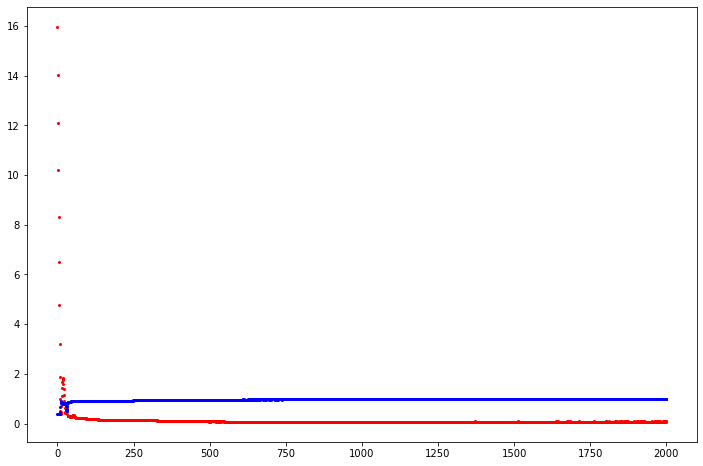

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()

In [61]:
# y_vacc에 테스트셋으로 실험 결과의 정확도를 저장
y_vacc=history.history['val_accuracy']

In [62]:
# y_loss에 학습셋으로 측정한 오차 값을 저장
y_loss=history.history['loss']

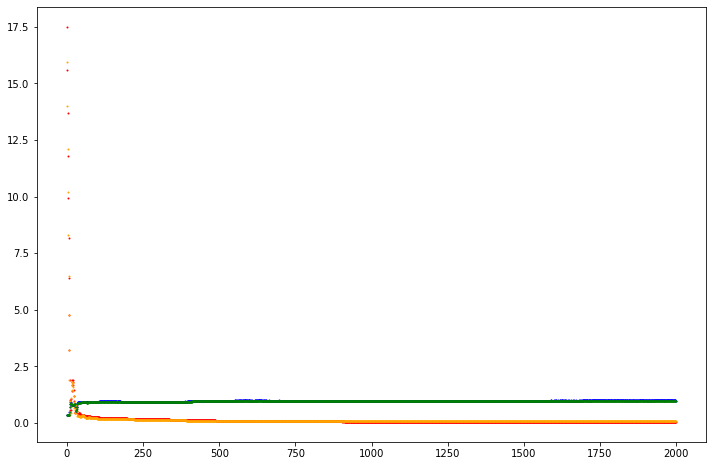

In [63]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12, 8))
plt.plot(x_len, y_loss, "o", c="red", markersize=1)
plt.plot(x_len, y_vacc, "o", c="blue", markersize=1)
plt.plot(x_len, y_vloss, "o", c="orange", markersize=1)
plt.plot(x_len, y_acc, "o", c="green", markersize=1)
plt.show()

In [64]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model2.evaluate(x_test, y_test, verbose=2)[1]))

114/114 - 0s - loss: 0.1351 - accuracy: 0.9649

 Accuracy: 0.9649


In [29]:
# 모델 컴파일 
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
import os
MODEL_DIR = './model2/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [32]:
model2.fit(x_train, y_train, validation_split=0.2, 
                     epochs=2000, batch_size=500, verbose=1, callbacks=[checkpointer])

Train on 364 samples, validate on 91 samples
Epoch 1/2000

Epoch 00001: val_loss improved from inf to 1.58702, saving model to ./model2/best001-1.5870.hdf5
364/364 [==============================] - 0s 1ms/sample - loss: 0.0677 - accuracy: 0.9643 - val_loss: 1.5870 - val_accuracy: 0.4945
Epoch 2/2000

Epoch 00002: val_loss improved from 1.58702 to 0.21331, saving model to ./model2/best002-0.2133.hdf5
364/364 [==============================] - 0s 50us/sample - loss: 1.6837 - accuracy: 0.5989 - val_loss: 0.2133 - val_accuracy: 0.8791
Epoch 3/2000

Epoch 00003: val_loss did not improve from 0.21331
364/364 [==============================] - 0s 19us/sample - loss: 0.1865 - accuracy: 0.9341 - val_loss: 1.5843 - val_accuracy: 0.7802
Epoch 4/2000

Epoch 00004: val_loss did not improve from 0.21331
364/364 [==============================] - 0s 22us/sample - loss: 1.5186 - accuracy: 0.7445 - val_loss: 0.8078 - val_accuracy: 0.8352
Epoch 5/2000

Epoch 00005: val_loss improved from 0.21331 to 0.0

Epoch 40/2000

Epoch 00040: val_loss did not improve from 0.06232
364/364 [==============================] - 0s 22us/sample - loss: 0.0836 - accuracy: 0.9698 - val_loss: 0.0751 - val_accuracy: 0.9780
Epoch 41/2000

Epoch 00041: val_loss did not improve from 0.06232
364/364 [==============================] - 0s 21us/sample - loss: 0.0914 - accuracy: 0.9698 - val_loss: 0.0711 - val_accuracy: 0.9780
Epoch 42/2000

Epoch 00042: val_loss did not improve from 0.06232
364/364 [==============================] - 0s 22us/sample - loss: 0.0840 - accuracy: 0.9698 - val_loss: 0.0643 - val_accuracy: 0.9780
Epoch 43/2000

Epoch 00043: val_loss did not improve from 0.06232
364/364 [==============================] - 0s 21us/sample - loss: 0.0726 - accuracy: 0.9615 - val_loss: 0.0634 - val_accuracy: 0.9780
Epoch 44/2000

Epoch 00044: val_loss did not improve from 0.06232
364/364 [==============================] - 0s 19us/sample - loss: 0.0716 - accuracy: 0.9670 - val_loss: 0.0684 - val_accuracy: 0.9780


Epoch 81/2000

Epoch 00081: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0686 - accuracy: 0.9643 - val_loss: 0.0621 - val_accuracy: 0.9780
Epoch 82/2000

Epoch 00082: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0688 - accuracy: 0.9670 - val_loss: 0.0622 - val_accuracy: 0.9780
Epoch 83/2000

Epoch 00083: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 22us/sample - loss: 0.0688 - accuracy: 0.9670 - val_loss: 0.0620 - val_accuracy: 0.9780
Epoch 84/2000

Epoch 00084: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0686 - accuracy: 0.9670 - val_loss: 0.0619 - val_accuracy: 0.9780
Epoch 85/2000

Epoch 00085: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 22us/sample - loss: 0.0684 - accuracy: 0.9643 - val_loss: 0.0618 - val_accuracy: 0.9780


Epoch 122/2000

Epoch 00122: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0676 - accuracy: 0.9643 - val_loss: 0.0619 - val_accuracy: 0.9780
Epoch 123/2000

Epoch 00123: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 22us/sample - loss: 0.0676 - accuracy: 0.9643 - val_loss: 0.0619 - val_accuracy: 0.9780
Epoch 124/2000

Epoch 00124: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0675 - accuracy: 0.9643 - val_loss: 0.0619 - val_accuracy: 0.9780
Epoch 125/2000

Epoch 00125: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0675 - accuracy: 0.9643 - val_loss: 0.0619 - val_accuracy: 0.9780
Epoch 126/2000

Epoch 00126: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0675 - accuracy: 0.9643 - val_loss: 0.0619 - val_accuracy: 0.

Epoch 163/2000

Epoch 00163: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0670 - accuracy: 0.9643 - val_loss: 0.0619 - val_accuracy: 0.9780
Epoch 164/2000

Epoch 00164: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 21us/sample - loss: 0.0670 - accuracy: 0.9643 - val_loss: 0.0619 - val_accuracy: 0.9780
Epoch 165/2000

Epoch 00165: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0670 - accuracy: 0.9643 - val_loss: 0.0619 - val_accuracy: 0.9780
Epoch 166/2000

Epoch 00166: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0670 - accuracy: 0.9643 - val_loss: 0.0620 - val_accuracy: 0.9780
Epoch 167/2000

Epoch 00167: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0670 - accuracy: 0.9643 - val_loss: 0.0620 - val_accuracy: 0.

Epoch 204/2000

Epoch 00204: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 20us/sample - loss: 0.0666 - accuracy: 0.9643 - val_loss: 0.0618 - val_accuracy: 0.9780
Epoch 205/2000

Epoch 00205: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 19us/sample - loss: 0.0666 - accuracy: 0.9643 - val_loss: 0.0618 - val_accuracy: 0.9780
Epoch 206/2000

Epoch 00206: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 22us/sample - loss: 0.0666 - accuracy: 0.9643 - val_loss: 0.0618 - val_accuracy: 0.9780
Epoch 207/2000

Epoch 00207: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 22us/sample - loss: 0.0666 - accuracy: 0.9643 - val_loss: 0.0618 - val_accuracy: 0.9780
Epoch 208/2000

Epoch 00208: val_loss did not improve from 0.06160
364/364 [==============================] - 0s 22us/sample - loss: 0.0666 - accuracy: 0.9643 - val_loss: 0.0618 - val_accuracy: 0.

364/364 [==============================] - 0s 52us/sample - loss: 0.0662 - accuracy: 0.9643 - val_loss: 0.0615 - val_accuracy: 0.9780
Epoch 245/2000

Epoch 00245: val_loss did not improve from 0.06151
364/364 [==============================] - 0s 22us/sample - loss: 0.0663 - accuracy: 0.9643 - val_loss: 0.0615 - val_accuracy: 0.9780
Epoch 246/2000

Epoch 00246: val_loss did not improve from 0.06151
364/364 [==============================] - 0s 18us/sample - loss: 0.0662 - accuracy: 0.9643 - val_loss: 0.0615 - val_accuracy: 0.9780
Epoch 247/2000

Epoch 00247: val_loss did not improve from 0.06151
364/364 [==============================] - 0s 19us/sample - loss: 0.0662 - accuracy: 0.9643 - val_loss: 0.0615 - val_accuracy: 0.9780
Epoch 248/2000

Epoch 00248: val_loss improved from 0.06151 to 0.06150, saving model to ./model2/best248-0.0615.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0662 - accuracy: 0.9643 - val_loss: 0.0615 - val_accuracy: 0.9780
Epoch 249/20

Epoch 282/2000

Epoch 00282: val_loss did not improve from 0.06123
364/364 [==============================] - 0s 19us/sample - loss: 0.0659 - accuracy: 0.9643 - val_loss: 0.0613 - val_accuracy: 0.9780
Epoch 283/2000

Epoch 00283: val_loss did not improve from 0.06123
364/364 [==============================] - 0s 20us/sample - loss: 0.0659 - accuracy: 0.9643 - val_loss: 0.0612 - val_accuracy: 0.9780
Epoch 284/2000

Epoch 00284: val_loss improved from 0.06123 to 0.06119, saving model to ./model2/best284-0.0612.hdf5
364/364 [==============================] - 0s 55us/sample - loss: 0.0659 - accuracy: 0.9670 - val_loss: 0.0612 - val_accuracy: 0.9780
Epoch 285/2000

Epoch 00285: val_loss improved from 0.06119 to 0.06118, saving model to ./model2/best285-0.0612.hdf5
364/364 [==============================] - 0s 55us/sample - loss: 0.0658 - accuracy: 0.9670 - val_loss: 0.0612 - val_accuracy: 0.9780
Epoch 286/2000

Epoch 00286: val_loss did not improve from 0.06118
364/364 [====================

Epoch 320/2000

Epoch 00320: val_loss improved from 0.06090 to 0.06088, saving model to ./model2/best320-0.0609.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0655 - accuracy: 0.9670 - val_loss: 0.0609 - val_accuracy: 0.9780
Epoch 321/2000

Epoch 00321: val_loss improved from 0.06088 to 0.06086, saving model to ./model2/best321-0.0609.hdf5
364/364 [==============================] - 0s 55us/sample - loss: 0.0655 - accuracy: 0.9670 - val_loss: 0.0609 - val_accuracy: 0.9780
Epoch 322/2000

Epoch 00322: val_loss did not improve from 0.06086
364/364 [==============================] - 0s 18us/sample - loss: 0.0655 - accuracy: 0.9670 - val_loss: 0.0609 - val_accuracy: 0.9780
Epoch 323/2000

Epoch 00323: val_loss did not improve from 0.06086
364/364 [==============================] - 0s 19us/sample - loss: 0.0655 - accuracy: 0.9643 - val_loss: 0.0609 - val_accuracy: 0.9780
Epoch 324/2000

Epoch 00324: val_loss did not improve from 0.06086
364/364 [====================

Epoch 358/2000

Epoch 00358: val_loss did not improve from 0.06060
364/364 [==============================] - 0s 19us/sample - loss: 0.0652 - accuracy: 0.9670 - val_loss: 0.0606 - val_accuracy: 0.9780
Epoch 359/2000

Epoch 00359: val_loss did not improve from 0.06060
364/364 [==============================] - 0s 19us/sample - loss: 0.0652 - accuracy: 0.9670 - val_loss: 0.0606 - val_accuracy: 0.9780
Epoch 360/2000

Epoch 00360: val_loss did not improve from 0.06060
364/364 [==============================] - 0s 18us/sample - loss: 0.0652 - accuracy: 0.9670 - val_loss: 0.0606 - val_accuracy: 0.9780
Epoch 361/2000

Epoch 00361: val_loss improved from 0.06060 to 0.06057, saving model to ./model2/best361-0.0606.hdf5
364/364 [==============================] - 0s 54us/sample - loss: 0.0651 - accuracy: 0.9670 - val_loss: 0.0606 - val_accuracy: 0.9780
Epoch 362/2000

Epoch 00362: val_loss improved from 0.06057 to 0.06052, saving model to ./model2/best362-0.0605.hdf5
364/364 [====================

Epoch 396/2000

Epoch 00396: val_loss improved from 0.06031 to 0.06026, saving model to ./model2/best396-0.0603.hdf5
364/364 [==============================] - 0s 49us/sample - loss: 0.0648 - accuracy: 0.9670 - val_loss: 0.0603 - val_accuracy: 0.9780
Epoch 397/2000

Epoch 00397: val_loss did not improve from 0.06026
364/364 [==============================] - 0s 22us/sample - loss: 0.0648 - accuracy: 0.9670 - val_loss: 0.0603 - val_accuracy: 0.9780
Epoch 398/2000

Epoch 00398: val_loss did not improve from 0.06026
364/364 [==============================] - 0s 22us/sample - loss: 0.0648 - accuracy: 0.9670 - val_loss: 0.0603 - val_accuracy: 0.9780
Epoch 399/2000

Epoch 00399: val_loss did not improve from 0.06026
364/364 [==============================] - 0s 19us/sample - loss: 0.0647 - accuracy: 0.9670 - val_loss: 0.0603 - val_accuracy: 0.9780
Epoch 400/2000

Epoch 00400: val_loss improved from 0.06026 to 0.06026, saving model to ./model2/best400-0.0603.hdf5
364/364 [====================

Epoch 434/2000

Epoch 00434: val_loss improved from 0.05998 to 0.05994, saving model to ./model2/best434-0.0599.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0644 - accuracy: 0.9698 - val_loss: 0.0599 - val_accuracy: 0.9780
Epoch 435/2000

Epoch 00435: val_loss did not improve from 0.05994
364/364 [==============================] - 0s 19us/sample - loss: 0.0644 - accuracy: 0.9698 - val_loss: 0.0599 - val_accuracy: 0.9780
Epoch 436/2000

Epoch 00436: val_loss did not improve from 0.05994
364/364 [==============================] - 0s 22us/sample - loss: 0.0644 - accuracy: 0.9670 - val_loss: 0.0600 - val_accuracy: 0.9780
Epoch 437/2000

Epoch 00437: val_loss did not improve from 0.05994
364/364 [==============================] - 0s 18us/sample - loss: 0.0644 - accuracy: 0.9670 - val_loss: 0.0599 - val_accuracy: 0.9780
Epoch 438/2000

Epoch 00438: val_loss did not improve from 0.05994
364/364 [==============================] - 0s 19us/sample - loss: 0.0643 - accu

Epoch 471/2000

Epoch 00471: val_loss improved from 0.05965 to 0.05963, saving model to ./model2/best471-0.0596.hdf5
364/364 [==============================] - 0s 55us/sample - loss: 0.0640 - accuracy: 0.9698 - val_loss: 0.0596 - val_accuracy: 0.9780
Epoch 472/2000

Epoch 00472: val_loss did not improve from 0.05963
364/364 [==============================] - 0s 19us/sample - loss: 0.0640 - accuracy: 0.9698 - val_loss: 0.0597 - val_accuracy: 0.9780
Epoch 473/2000

Epoch 00473: val_loss did not improve from 0.05963
364/364 [==============================] - 0s 16us/sample - loss: 0.0640 - accuracy: 0.9698 - val_loss: 0.0597 - val_accuracy: 0.9780
Epoch 474/2000

Epoch 00474: val_loss did not improve from 0.05963
364/364 [==============================] - 0s 19us/sample - loss: 0.0640 - accuracy: 0.9698 - val_loss: 0.0596 - val_accuracy: 0.9780
Epoch 475/2000

Epoch 00475: val_loss improved from 0.05963 to 0.05962, saving model to ./model2/best475-0.0596.hdf5
364/364 [====================

Epoch 508/2000

Epoch 00508: val_loss improved from 0.05933 to 0.05932, saving model to ./model2/best508-0.0593.hdf5
364/364 [==============================] - 0s 55us/sample - loss: 0.0636 - accuracy: 0.9698 - val_loss: 0.0593 - val_accuracy: 0.9780
Epoch 509/2000

Epoch 00509: val_loss did not improve from 0.05932
364/364 [==============================] - 0s 19us/sample - loss: 0.0636 - accuracy: 0.9698 - val_loss: 0.0593 - val_accuracy: 0.9780
Epoch 510/2000

Epoch 00510: val_loss improved from 0.05932 to 0.05931, saving model to ./model2/best510-0.0593.hdf5
364/364 [==============================] - 0s 53us/sample - loss: 0.0636 - accuracy: 0.9698 - val_loss: 0.0593 - val_accuracy: 0.9780
Epoch 511/2000

Epoch 00511: val_loss improved from 0.05931 to 0.05928, saving model to ./model2/best511-0.0593.hdf5
364/364 [==============================] - 0s 55us/sample - loss: 0.0636 - accuracy: 0.9698 - val_loss: 0.0593 - val_accuracy: 0.9780
Epoch 512/2000

Epoch 00512: val_loss did not 

364/364 [==============================] - 0s 51us/sample - loss: 0.0632 - accuracy: 0.9698 - val_loss: 0.0590 - val_accuracy: 0.9780
Epoch 545/2000

Epoch 00545: val_loss did not improve from 0.05898
364/364 [==============================] - 0s 19us/sample - loss: 0.0632 - accuracy: 0.9698 - val_loss: 0.0590 - val_accuracy: 0.9780
Epoch 546/2000

Epoch 00546: val_loss did not improve from 0.05898
364/364 [==============================] - 0s 21us/sample - loss: 0.0632 - accuracy: 0.9698 - val_loss: 0.0590 - val_accuracy: 0.9780
Epoch 547/2000

Epoch 00547: val_loss did not improve from 0.05898
364/364 [==============================] - 0s 22us/sample - loss: 0.0632 - accuracy: 0.9725 - val_loss: 0.0590 - val_accuracy: 0.9780
Epoch 548/2000

Epoch 00548: val_loss did not improve from 0.05898
364/364 [==============================] - 0s 25us/sample - loss: 0.0632 - accuracy: 0.9698 - val_loss: 0.0590 - val_accuracy: 0.9780
Epoch 549/2000

Epoch 00549: val_loss did not improve from 0.0

Epoch 582/2000

Epoch 00582: val_loss improved from 0.05867 to 0.05867, saving model to ./model2/best582-0.0587.hdf5
364/364 [==============================] - 0s 50us/sample - loss: 0.0628 - accuracy: 0.9698 - val_loss: 0.0587 - val_accuracy: 0.9780
Epoch 583/2000

Epoch 00583: val_loss improved from 0.05867 to 0.05867, saving model to ./model2/best583-0.0587.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0628 - accuracy: 0.9725 - val_loss: 0.0587 - val_accuracy: 0.9780
Epoch 584/2000

Epoch 00584: val_loss did not improve from 0.05867
364/364 [==============================] - 0s 20us/sample - loss: 0.0628 - accuracy: 0.9725 - val_loss: 0.0587 - val_accuracy: 0.9780
Epoch 585/2000

Epoch 00585: val_loss improved from 0.05867 to 0.05866, saving model to ./model2/best585-0.0587.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0628 - accuracy: 0.9698 - val_loss: 0.0587 - val_accuracy: 0.9780
Epoch 586/2000

Epoch 00586: val_loss improved

Epoch 620/2000

Epoch 00620: val_loss improved from 0.05834 to 0.05834, saving model to ./model2/best620-0.0583.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0624 - accuracy: 0.9725 - val_loss: 0.0583 - val_accuracy: 0.9780
Epoch 621/2000

Epoch 00621: val_loss improved from 0.05834 to 0.05833, saving model to ./model2/best621-0.0583.hdf5
364/364 [==============================] - 0s 53us/sample - loss: 0.0624 - accuracy: 0.9725 - val_loss: 0.0583 - val_accuracy: 0.9780
Epoch 622/2000

Epoch 00622: val_loss did not improve from 0.05833
364/364 [==============================] - 0s 21us/sample - loss: 0.0624 - accuracy: 0.9725 - val_loss: 0.0584 - val_accuracy: 0.9780
Epoch 623/2000

Epoch 00623: val_loss improved from 0.05833 to 0.05833, saving model to ./model2/best623-0.0583.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0623 - accuracy: 0.9725 - val_loss: 0.0583 - val_accuracy: 0.9780
Epoch 624/2000

Epoch 00624: val_loss improved

Epoch 657/2000

Epoch 00657: val_loss improved from 0.05800 to 0.05798, saving model to ./model2/best657-0.0580.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0620 - accuracy: 0.9725 - val_loss: 0.0580 - val_accuracy: 0.9780
Epoch 658/2000

Epoch 00658: val_loss did not improve from 0.05798
364/364 [==============================] - 0s 22us/sample - loss: 0.0620 - accuracy: 0.9725 - val_loss: 0.0580 - val_accuracy: 0.9780
Epoch 659/2000

Epoch 00659: val_loss did not improve from 0.05798
364/364 [==============================] - 0s 19us/sample - loss: 0.0620 - accuracy: 0.9725 - val_loss: 0.0580 - val_accuracy: 0.9780
Epoch 660/2000

Epoch 00660: val_loss did not improve from 0.05798
364/364 [==============================] - 0s 19us/sample - loss: 0.0619 - accuracy: 0.9725 - val_loss: 0.0581 - val_accuracy: 0.9780
Epoch 661/2000

Epoch 00661: val_loss did not improve from 0.05798
364/364 [==============================] - 0s 21us/sample - loss: 0.0620 - accu

Epoch 695/2000

Epoch 00695: val_loss did not improve from 0.05766
364/364 [==============================] - 0s 19us/sample - loss: 0.0616 - accuracy: 0.9725 - val_loss: 0.0577 - val_accuracy: 0.9780
Epoch 696/2000

Epoch 00696: val_loss did not improve from 0.05766
364/364 [==============================] - 0s 19us/sample - loss: 0.0615 - accuracy: 0.9725 - val_loss: 0.0577 - val_accuracy: 0.9780
Epoch 697/2000

Epoch 00697: val_loss did not improve from 0.05766
364/364 [==============================] - 0s 22us/sample - loss: 0.0615 - accuracy: 0.9725 - val_loss: 0.0577 - val_accuracy: 0.9780
Epoch 698/2000

Epoch 00698: val_loss did not improve from 0.05766
364/364 [==============================] - 0s 22us/sample - loss: 0.0615 - accuracy: 0.9725 - val_loss: 0.0577 - val_accuracy: 0.9780
Epoch 699/2000

Epoch 00699: val_loss did not improve from 0.05766
364/364 [==============================] - 0s 21us/sample - loss: 0.0615 - accuracy: 0.9725 - val_loss: 0.0577 - val_accuracy: 0.

Epoch 732/2000

Epoch 00732: val_loss did not improve from 0.05737
364/364 [==============================] - 0s 22us/sample - loss: 0.0611 - accuracy: 0.9725 - val_loss: 0.0574 - val_accuracy: 0.9780
Epoch 733/2000

Epoch 00733: val_loss did not improve from 0.05737
364/364 [==============================] - 0s 22us/sample - loss: 0.0611 - accuracy: 0.9725 - val_loss: 0.0574 - val_accuracy: 0.9780
Epoch 734/2000

Epoch 00734: val_loss improved from 0.05737 to 0.05737, saving model to ./model2/best734-0.0574.hdf5
364/364 [==============================] - 0s 57us/sample - loss: 0.0611 - accuracy: 0.9725 - val_loss: 0.0574 - val_accuracy: 0.9780
Epoch 735/2000

Epoch 00735: val_loss improved from 0.05737 to 0.05737, saving model to ./model2/best735-0.0574.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0611 - accuracy: 0.9725 - val_loss: 0.0574 - val_accuracy: 0.9780
Epoch 736/2000

Epoch 00736: val_loss did not improve from 0.05737
364/364 [====================

Epoch 769/2000

Epoch 00769: val_loss improved from 0.05703 to 0.05702, saving model to ./model2/best769-0.0570.hdf5
364/364 [==============================] - 0s 204us/sample - loss: 0.0607 - accuracy: 0.9725 - val_loss: 0.0570 - val_accuracy: 0.9780
Epoch 770/2000

Epoch 00770: val_loss did not improve from 0.05702
364/364 [==============================] - 0s 17us/sample - loss: 0.0607 - accuracy: 0.9725 - val_loss: 0.0570 - val_accuracy: 0.9780
Epoch 771/2000

Epoch 00771: val_loss did not improve from 0.05702
364/364 [==============================] - 0s 17us/sample - loss: 0.0607 - accuracy: 0.9725 - val_loss: 0.0571 - val_accuracy: 0.9780
Epoch 772/2000

Epoch 00772: val_loss did not improve from 0.05702
364/364 [==============================] - 0s 19us/sample - loss: 0.0607 - accuracy: 0.9725 - val_loss: 0.0571 - val_accuracy: 0.9780
Epoch 773/2000

Epoch 00773: val_loss improved from 0.05702 to 0.05699, saving model to ./model2/best773-0.0570.hdf5
364/364 [===================

Epoch 806/2000

Epoch 00806: val_loss improved from 0.05673 to 0.05672, saving model to ./model2/best806-0.0567.hdf5
364/364 [==============================] - 0s 49us/sample - loss: 0.0603 - accuracy: 0.9725 - val_loss: 0.0567 - val_accuracy: 0.9780
Epoch 807/2000

Epoch 00807: val_loss did not improve from 0.05672
364/364 [==============================] - 0s 19us/sample - loss: 0.0603 - accuracy: 0.9725 - val_loss: 0.0567 - val_accuracy: 0.9780
Epoch 808/2000

Epoch 00808: val_loss did not improve from 0.05672
364/364 [==============================] - 0s 19us/sample - loss: 0.0603 - accuracy: 0.9725 - val_loss: 0.0567 - val_accuracy: 0.9780
Epoch 809/2000

Epoch 00809: val_loss did not improve from 0.05672
364/364 [==============================] - 0s 19us/sample - loss: 0.0602 - accuracy: 0.9725 - val_loss: 0.0567 - val_accuracy: 0.9780
Epoch 810/2000

Epoch 00810: val_loss improved from 0.05672 to 0.05671, saving model to ./model2/best810-0.0567.hdf5
364/364 [====================

364/364 [==============================] - 0s 54us/sample - loss: 0.0599 - accuracy: 0.9725 - val_loss: 0.0564 - val_accuracy: 0.9780
Epoch 844/2000

Epoch 00844: val_loss improved from 0.05642 to 0.05641, saving model to ./model2/best844-0.0564.hdf5
364/364 [==============================] - 0s 55us/sample - loss: 0.0599 - accuracy: 0.9725 - val_loss: 0.0564 - val_accuracy: 0.9780
Epoch 845/2000

Epoch 00845: val_loss did not improve from 0.05641
364/364 [==============================] - 0s 22us/sample - loss: 0.0598 - accuracy: 0.9725 - val_loss: 0.0565 - val_accuracy: 0.9780
Epoch 846/2000

Epoch 00846: val_loss did not improve from 0.05641
364/364 [==============================] - 0s 21us/sample - loss: 0.0598 - accuracy: 0.9725 - val_loss: 0.0564 - val_accuracy: 0.9780
Epoch 847/2000

Epoch 00847: val_loss improved from 0.05641 to 0.05641, saving model to ./model2/best847-0.0564.hdf5
364/364 [==============================] - 0s 53us/sample - loss: 0.0598 - accuracy: 0.9725 - va

Epoch 881/2000

Epoch 00881: val_loss did not improve from 0.05611
364/364 [==============================] - 0s 19us/sample - loss: 0.0594 - accuracy: 0.9725 - val_loss: 0.0562 - val_accuracy: 0.9780
Epoch 882/2000

Epoch 00882: val_loss did not improve from 0.05611
364/364 [==============================] - 0s 19us/sample - loss: 0.0594 - accuracy: 0.9725 - val_loss: 0.0561 - val_accuracy: 0.9780
Epoch 883/2000

Epoch 00883: val_loss improved from 0.05611 to 0.05611, saving model to ./model2/best883-0.0561.hdf5
364/364 [==============================] - 0s 56us/sample - loss: 0.0594 - accuracy: 0.9725 - val_loss: 0.0561 - val_accuracy: 0.9780
Epoch 884/2000

Epoch 00884: val_loss improved from 0.05611 to 0.05611, saving model to ./model2/best884-0.0561.hdf5
364/364 [==============================] - 0s 51us/sample - loss: 0.0594 - accuracy: 0.9725 - val_loss: 0.0561 - val_accuracy: 0.9780
Epoch 885/2000

Epoch 00885: val_loss did not improve from 0.05611
364/364 [====================

Epoch 919/2000

Epoch 00919: val_loss did not improve from 0.05569
364/364 [==============================] - 0s 19us/sample - loss: 0.0590 - accuracy: 0.9725 - val_loss: 0.0559 - val_accuracy: 0.9780
Epoch 920/2000

Epoch 00920: val_loss did not improve from 0.05569
364/364 [==============================] - 0s 22us/sample - loss: 0.0590 - accuracy: 0.9725 - val_loss: 0.0558 - val_accuracy: 0.9780
Epoch 921/2000

Epoch 00921: val_loss did not improve from 0.05569
364/364 [==============================] - 0s 19us/sample - loss: 0.0590 - accuracy: 0.9753 - val_loss: 0.0557 - val_accuracy: 0.9780
Epoch 922/2000

Epoch 00922: val_loss did not improve from 0.05569
364/364 [==============================] - 0s 22us/sample - loss: 0.0590 - accuracy: 0.9725 - val_loss: 0.0557 - val_accuracy: 0.9780
Epoch 923/2000

Epoch 00923: val_loss did not improve from 0.05569
364/364 [==============================] - 0s 20us/sample - loss: 0.0590 - accuracy: 0.9725 - val_loss: 0.0558 - val_accuracy: 0.

Epoch 958/2000

Epoch 00958: val_loss did not improve from 0.05539
364/364 [==============================] - 0s 22us/sample - loss: 0.0585 - accuracy: 0.9725 - val_loss: 0.0555 - val_accuracy: 0.9780
Epoch 959/2000

Epoch 00959: val_loss did not improve from 0.05539
364/364 [==============================] - 0s 19us/sample - loss: 0.0586 - accuracy: 0.9725 - val_loss: 0.0556 - val_accuracy: 0.9780
Epoch 960/2000

Epoch 00960: val_loss did not improve from 0.05539
364/364 [==============================] - 0s 19us/sample - loss: 0.0585 - accuracy: 0.9753 - val_loss: 0.0554 - val_accuracy: 0.9780
Epoch 961/2000

Epoch 00961: val_loss improved from 0.05539 to 0.05536, saving model to ./model2/best961-0.0554.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0586 - accuracy: 0.9753 - val_loss: 0.0554 - val_accuracy: 0.9780
Epoch 962/2000

Epoch 00962: val_loss improved from 0.05536 to 0.05532, saving model to ./model2/best962-0.0553.hdf5
364/364 [====================

364/364 [==============================] - 0s 58us/sample - loss: 0.0581 - accuracy: 0.9753 - val_loss: 0.0552 - val_accuracy: 0.9780
Epoch 997/2000

Epoch 00997: val_loss did not improve from 0.05517
364/364 [==============================] - 0s 25us/sample - loss: 0.0581 - accuracy: 0.9725 - val_loss: 0.0552 - val_accuracy: 0.9780
Epoch 998/2000

Epoch 00998: val_loss did not improve from 0.05517
364/364 [==============================] - 0s 19us/sample - loss: 0.0581 - accuracy: 0.9725 - val_loss: 0.0552 - val_accuracy: 0.9780
Epoch 999/2000

Epoch 00999: val_loss improved from 0.05517 to 0.05514, saving model to ./model2/best999-0.0551.hdf5
364/364 [==============================] - 0s 54us/sample - loss: 0.0581 - accuracy: 0.9753 - val_loss: 0.0551 - val_accuracy: 0.9780
Epoch 1000/2000

Epoch 01000: val_loss did not improve from 0.05514
364/364 [==============================] - 0s 17us/sample - loss: 0.0581 - accuracy: 0.9725 - val_loss: 0.0552 - val_accuracy: 0.9780
Epoch 1001/

Epoch 1034/2000

Epoch 01034: val_loss did not improve from 0.05473
364/364 [==============================] - 0s 22us/sample - loss: 0.0577 - accuracy: 0.9753 - val_loss: 0.0548 - val_accuracy: 0.9780
Epoch 1035/2000

Epoch 01035: val_loss did not improve from 0.05473
364/364 [==============================] - 0s 19us/sample - loss: 0.0577 - accuracy: 0.9725 - val_loss: 0.0547 - val_accuracy: 0.9780
Epoch 1036/2000

Epoch 01036: val_loss did not improve from 0.05473
364/364 [==============================] - 0s 24us/sample - loss: 0.0577 - accuracy: 0.9753 - val_loss: 0.0548 - val_accuracy: 0.9780
Epoch 1037/2000

Epoch 01037: val_loss did not improve from 0.05473
364/364 [==============================] - 0s 19us/sample - loss: 0.0577 - accuracy: 0.9753 - val_loss: 0.0548 - val_accuracy: 0.9780
Epoch 1038/2000

Epoch 01038: val_loss did not improve from 0.05473
364/364 [==============================] - 0s 19us/sample - loss: 0.0576 - accuracy: 0.9725 - val_loss: 0.0550 - val_accurac

Epoch 1073/2000

Epoch 01073: val_loss improved from 0.05444 to 0.05440, saving model to ./model2/best1073-0.0544.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0572 - accuracy: 0.9753 - val_loss: 0.0544 - val_accuracy: 0.9780
Epoch 1074/2000

Epoch 01074: val_loss improved from 0.05440 to 0.05436, saving model to ./model2/best1074-0.0544.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0573 - accuracy: 0.9753 - val_loss: 0.0544 - val_accuracy: 0.9780
Epoch 1075/2000

Epoch 01075: val_loss did not improve from 0.05436
364/364 [==============================] - 0s 22us/sample - loss: 0.0573 - accuracy: 0.9753 - val_loss: 0.0544 - val_accuracy: 0.9780
Epoch 1076/2000

Epoch 01076: val_loss did not improve from 0.05436
364/364 [==============================] - 0s 19us/sample - loss: 0.0573 - accuracy: 0.9753 - val_loss: 0.0544 - val_accuracy: 0.9780
Epoch 1077/2000

Epoch 01077: val_loss did not improve from 0.05436
364/364 [=============

Epoch 1112/2000

Epoch 01112: val_loss did not improve from 0.05412
364/364 [==============================] - 0s 21us/sample - loss: 0.0568 - accuracy: 0.9753 - val_loss: 0.0542 - val_accuracy: 0.9780
Epoch 1113/2000

Epoch 01113: val_loss did not improve from 0.05412
364/364 [==============================] - 0s 22us/sample - loss: 0.0568 - accuracy: 0.9753 - val_loss: 0.0541 - val_accuracy: 0.9780
Epoch 1114/2000

Epoch 01114: val_loss did not improve from 0.05412
364/364 [==============================] - 0s 23us/sample - loss: 0.0568 - accuracy: 0.9753 - val_loss: 0.0542 - val_accuracy: 0.9780
Epoch 1115/2000

Epoch 01115: val_loss did not improve from 0.05412
364/364 [==============================] - 0s 19us/sample - loss: 0.0568 - accuracy: 0.9753 - val_loss: 0.0542 - val_accuracy: 0.9780
Epoch 1116/2000

Epoch 01116: val_loss did not improve from 0.05412
364/364 [==============================] - 0s 20us/sample - loss: 0.0567 - accuracy: 0.9753 - val_loss: 0.0542 - val_accurac

364/364 [==============================] - 0s 55us/sample - loss: 0.0564 - accuracy: 0.9753 - val_loss: 0.0539 - val_accuracy: 0.9780
Epoch 1152/2000

Epoch 01152: val_loss did not improve from 0.05392
364/364 [==============================] - 0s 22us/sample - loss: 0.0563 - accuracy: 0.9753 - val_loss: 0.0540 - val_accuracy: 0.9780
Epoch 1153/2000

Epoch 01153: val_loss did not improve from 0.05392
364/364 [==============================] - 0s 22us/sample - loss: 0.0563 - accuracy: 0.9753 - val_loss: 0.0540 - val_accuracy: 0.9780
Epoch 1154/2000

Epoch 01154: val_loss did not improve from 0.05392
364/364 [==============================] - 0s 22us/sample - loss: 0.0563 - accuracy: 0.9753 - val_loss: 0.0540 - val_accuracy: 0.9780
Epoch 1155/2000

Epoch 01155: val_loss improved from 0.05392 to 0.05386, saving model to ./model2/best1155-0.0539.hdf5
364/364 [==============================] - 0s 53us/sample - loss: 0.0563 - accuracy: 0.9753 - val_loss: 0.0539 - val_accuracy: 0.9780
Epoch 1

Epoch 1191/2000

Epoch 01191: val_loss improved from 0.05358 to 0.05358, saving model to ./model2/best1191-0.0536.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0559 - accuracy: 0.9753 - val_loss: 0.0536 - val_accuracy: 0.9780
Epoch 1192/2000

Epoch 01192: val_loss did not improve from 0.05358
364/364 [==============================] - 0s 19us/sample - loss: 0.0559 - accuracy: 0.9780 - val_loss: 0.0536 - val_accuracy: 0.9780
Epoch 1193/2000

Epoch 01193: val_loss did not improve from 0.05358
364/364 [==============================] - 0s 21us/sample - loss: 0.0559 - accuracy: 0.9753 - val_loss: 0.0537 - val_accuracy: 0.9780
Epoch 1194/2000

Epoch 01194: val_loss did not improve from 0.05358
364/364 [==============================] - 0s 19us/sample - loss: 0.0559 - accuracy: 0.9753 - val_loss: 0.0537 - val_accuracy: 0.9780
Epoch 1195/2000

Epoch 01195: val_loss did not improve from 0.05358
364/364 [==============================] - 0s 19us/sample - loss: 0.0559 

Epoch 1230/2000

Epoch 01230: val_loss did not improve from 0.05334
364/364 [==============================] - 0s 22us/sample - loss: 0.0555 - accuracy: 0.9753 - val_loss: 0.0534 - val_accuracy: 0.9780
Epoch 1231/2000

Epoch 01231: val_loss improved from 0.05334 to 0.05325, saving model to ./model2/best1231-0.0532.hdf5
364/364 [==============================] - 0s 55us/sample - loss: 0.0555 - accuracy: 0.9753 - val_loss: 0.0532 - val_accuracy: 0.9780
Epoch 1232/2000

Epoch 01232: val_loss did not improve from 0.05325
364/364 [==============================] - 0s 20us/sample - loss: 0.0555 - accuracy: 0.9780 - val_loss: 0.0533 - val_accuracy: 0.9780
Epoch 1233/2000

Epoch 01233: val_loss did not improve from 0.05325
364/364 [==============================] - 0s 19us/sample - loss: 0.0554 - accuracy: 0.9753 - val_loss: 0.0533 - val_accuracy: 0.9780
Epoch 1234/2000

Epoch 01234: val_loss did not improve from 0.05325
364/364 [==============================] - 0s 18us/sample - loss: 0.0554 

Epoch 1270/2000

Epoch 01270: val_loss did not improve from 0.05297
364/364 [==============================] - 0s 19us/sample - loss: 0.0550 - accuracy: 0.9780 - val_loss: 0.0530 - val_accuracy: 0.9780
Epoch 1271/2000

Epoch 01271: val_loss did not improve from 0.05297
364/364 [==============================] - 0s 22us/sample - loss: 0.0550 - accuracy: 0.9780 - val_loss: 0.0531 - val_accuracy: 0.9780
Epoch 1272/2000

Epoch 01272: val_loss did not improve from 0.05297
364/364 [==============================] - 0s 22us/sample - loss: 0.0550 - accuracy: 0.9753 - val_loss: 0.0531 - val_accuracy: 0.9780
Epoch 1273/2000

Epoch 01273: val_loss did not improve from 0.05297
364/364 [==============================] - 0s 22us/sample - loss: 0.0550 - accuracy: 0.9780 - val_loss: 0.0530 - val_accuracy: 0.9780
Epoch 1274/2000

Epoch 01274: val_loss improved from 0.05297 to 0.05291, saving model to ./model2/best1274-0.0529.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0550 

Epoch 1309/2000

Epoch 01309: val_loss did not improve from 0.05267
364/364 [==============================] - 0s 19us/sample - loss: 0.0546 - accuracy: 0.9780 - val_loss: 0.0527 - val_accuracy: 0.9780
Epoch 1310/2000

Epoch 01310: val_loss did not improve from 0.05267
364/364 [==============================] - 0s 19us/sample - loss: 0.0546 - accuracy: 0.9753 - val_loss: 0.0528 - val_accuracy: 0.9780
Epoch 1311/2000

Epoch 01311: val_loss did not improve from 0.05267
364/364 [==============================] - 0s 19us/sample - loss: 0.0546 - accuracy: 0.9780 - val_loss: 0.0527 - val_accuracy: 0.9780
Epoch 1312/2000

Epoch 01312: val_loss did not improve from 0.05267
364/364 [==============================] - 0s 19us/sample - loss: 0.0546 - accuracy: 0.9780 - val_loss: 0.0529 - val_accuracy: 0.9780
Epoch 1313/2000

Epoch 01313: val_loss did not improve from 0.05267
364/364 [==============================] - 0s 17us/sample - loss: 0.0545 - accuracy: 0.9780 - val_loss: 0.0528 - val_accurac

Epoch 1349/2000

Epoch 01349: val_loss did not improve from 0.05246
364/364 [==============================] - 0s 19us/sample - loss: 0.0542 - accuracy: 0.9780 - val_loss: 0.0525 - val_accuracy: 0.9780
Epoch 1350/2000

Epoch 01350: val_loss improved from 0.05246 to 0.05239, saving model to ./model2/best1350-0.0524.hdf5
364/364 [==============================] - 0s 53us/sample - loss: 0.0541 - accuracy: 0.9753 - val_loss: 0.0524 - val_accuracy: 0.9780
Epoch 1351/2000

Epoch 01351: val_loss did not improve from 0.05239
364/364 [==============================] - 0s 19us/sample - loss: 0.0541 - accuracy: 0.9780 - val_loss: 0.0524 - val_accuracy: 0.9780
Epoch 1352/2000

Epoch 01352: val_loss did not improve from 0.05239
364/364 [==============================] - 0s 19us/sample - loss: 0.0541 - accuracy: 0.9753 - val_loss: 0.0524 - val_accuracy: 0.9780
Epoch 1353/2000

Epoch 01353: val_loss did not improve from 0.05239
364/364 [==============================] - 0s 19us/sample - loss: 0.0541 

Epoch 1388/2000

Epoch 01388: val_loss did not improve from 0.05209
364/364 [==============================] - 0s 19us/sample - loss: 0.0539 - accuracy: 0.9780 - val_loss: 0.0522 - val_accuracy: 0.9780
Epoch 1389/2000

Epoch 01389: val_loss did not improve from 0.05209
364/364 [==============================] - 0s 21us/sample - loss: 0.0537 - accuracy: 0.9780 - val_loss: 0.0522 - val_accuracy: 0.9780
Epoch 1390/2000

Epoch 01390: val_loss did not improve from 0.05209
364/364 [==============================] - 0s 23us/sample - loss: 0.0537 - accuracy: 0.9780 - val_loss: 0.0521 - val_accuracy: 0.9780
Epoch 1391/2000

Epoch 01391: val_loss did not improve from 0.05209
364/364 [==============================] - 0s 19us/sample - loss: 0.0538 - accuracy: 0.9780 - val_loss: 0.0525 - val_accuracy: 0.9780
Epoch 1392/2000

Epoch 01392: val_loss did not improve from 0.05209
364/364 [==============================] - 0s 19us/sample - loss: 0.0537 - accuracy: 0.9780 - val_loss: 0.0524 - val_accurac

364/364 [==============================] - 0s 58us/sample - loss: 0.0533 - accuracy: 0.9780 - val_loss: 0.0518 - val_accuracy: 0.9780
Epoch 1428/2000

Epoch 01428: val_loss did not improve from 0.05182
364/364 [==============================] - 0s 22us/sample - loss: 0.0533 - accuracy: 0.9780 - val_loss: 0.0518 - val_accuracy: 0.9780
Epoch 1429/2000

Epoch 01429: val_loss did not improve from 0.05182
364/364 [==============================] - 0s 20us/sample - loss: 0.0533 - accuracy: 0.9753 - val_loss: 0.0518 - val_accuracy: 0.9780
Epoch 1430/2000

Epoch 01430: val_loss did not improve from 0.05182
364/364 [==============================] - 0s 21us/sample - loss: 0.0533 - accuracy: 0.9753 - val_loss: 0.0518 - val_accuracy: 0.9780
Epoch 1431/2000

Epoch 01431: val_loss did not improve from 0.05182
364/364 [==============================] - 0s 20us/sample - loss: 0.0533 - accuracy: 0.9780 - val_loss: 0.0520 - val_accuracy: 0.9780
Epoch 1432/2000

Epoch 01432: val_loss did not improve fro

Epoch 1467/2000

Epoch 01467: val_loss did not improve from 0.05156
364/364 [==============================] - 0s 19us/sample - loss: 0.0529 - accuracy: 0.9780 - val_loss: 0.0518 - val_accuracy: 0.9780
Epoch 1468/2000

Epoch 01468: val_loss did not improve from 0.05156
364/364 [==============================] - 0s 19us/sample - loss: 0.0528 - accuracy: 0.9808 - val_loss: 0.0516 - val_accuracy: 0.9780
Epoch 1469/2000

Epoch 01469: val_loss improved from 0.05156 to 0.05152, saving model to ./model2/best1469-0.0515.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0528 - accuracy: 0.9780 - val_loss: 0.0515 - val_accuracy: 0.9780
Epoch 1470/2000

Epoch 01470: val_loss did not improve from 0.05152
364/364 [==============================] - 0s 18us/sample - loss: 0.0528 - accuracy: 0.9780 - val_loss: 0.0516 - val_accuracy: 0.9780
Epoch 1471/2000

Epoch 01471: val_loss did not improve from 0.05152
364/364 [==============================] - 0s 18us/sample - loss: 0.0528 

364/364 [==============================] - 0s 56us/sample - loss: 0.0525 - accuracy: 0.9780 - val_loss: 0.0513 - val_accuracy: 0.9780
Epoch 1507/2000

Epoch 01507: val_loss did not improve from 0.05128
364/364 [==============================] - 0s 22us/sample - loss: 0.0524 - accuracy: 0.9808 - val_loss: 0.0514 - val_accuracy: 0.9780
Epoch 1508/2000

Epoch 01508: val_loss did not improve from 0.05128
364/364 [==============================] - 0s 22us/sample - loss: 0.0524 - accuracy: 0.9780 - val_loss: 0.0514 - val_accuracy: 0.9780
Epoch 1509/2000

Epoch 01509: val_loss did not improve from 0.05128
364/364 [==============================] - 0s 19us/sample - loss: 0.0524 - accuracy: 0.9808 - val_loss: 0.0516 - val_accuracy: 0.9780
Epoch 1510/2000

Epoch 01510: val_loss did not improve from 0.05128
364/364 [==============================] - 0s 22us/sample - loss: 0.0524 - accuracy: 0.9808 - val_loss: 0.0517 - val_accuracy: 0.9780
Epoch 1511/2000

Epoch 01511: val_loss did not improve fro

Epoch 1546/2000

Epoch 01546: val_loss did not improve from 0.05094
364/364 [==============================] - 0s 22us/sample - loss: 0.0521 - accuracy: 0.9808 - val_loss: 0.0515 - val_accuracy: 0.9780
Epoch 1547/2000

Epoch 01547: val_loss did not improve from 0.05094
364/364 [==============================] - 0s 22us/sample - loss: 0.0520 - accuracy: 0.9780 - val_loss: 0.0511 - val_accuracy: 0.9780
Epoch 1548/2000

Epoch 01548: val_loss improved from 0.05094 to 0.05094, saving model to ./model2/best1548-0.0509.hdf5
364/364 [==============================] - 0s 63us/sample - loss: 0.0520 - accuracy: 0.9808 - val_loss: 0.0509 - val_accuracy: 0.9780
Epoch 1549/2000

Epoch 01549: val_loss did not improve from 0.05094
364/364 [==============================] - 0s 27us/sample - loss: 0.0520 - accuracy: 0.9808 - val_loss: 0.0511 - val_accuracy: 0.9780
Epoch 1550/2000

Epoch 01550: val_loss improved from 0.05094 to 0.05086, saving model to ./model2/best1550-0.0509.hdf5
364/364 [=============

Epoch 1585/2000

Epoch 01585: val_loss did not improve from 0.05062
364/364 [==============================] - 0s 19us/sample - loss: 0.0516 - accuracy: 0.9808 - val_loss: 0.0514 - val_accuracy: 0.9780
Epoch 1586/2000

Epoch 01586: val_loss did not improve from 0.05062
364/364 [==============================] - 0s 19us/sample - loss: 0.0517 - accuracy: 0.9780 - val_loss: 0.0508 - val_accuracy: 0.9780
Epoch 1587/2000

Epoch 01587: val_loss did not improve from 0.05062
364/364 [==============================] - 0s 19us/sample - loss: 0.0518 - accuracy: 0.9835 - val_loss: 0.0513 - val_accuracy: 0.9780
Epoch 1588/2000

Epoch 01588: val_loss improved from 0.05062 to 0.05058, saving model to ./model2/best1588-0.0506.hdf5
364/364 [==============================] - 0s 55us/sample - loss: 0.0518 - accuracy: 0.9780 - val_loss: 0.0506 - val_accuracy: 0.9780
Epoch 1589/2000

Epoch 01589: val_loss did not improve from 0.05058
364/364 [==============================] - 0s 19us/sample - loss: 0.0517 

Epoch 1624/2000

Epoch 01624: val_loss did not improve from 0.05034
364/364 [==============================] - 0s 19us/sample - loss: 0.0512 - accuracy: 0.9808 - val_loss: 0.0509 - val_accuracy: 0.9780
Epoch 1625/2000

Epoch 01625: val_loss did not improve from 0.05034
364/364 [==============================] - 0s 21us/sample - loss: 0.0512 - accuracy: 0.9780 - val_loss: 0.0506 - val_accuracy: 0.9780
Epoch 1626/2000

Epoch 01626: val_loss did not improve from 0.05034
364/364 [==============================] - 0s 22us/sample - loss: 0.0514 - accuracy: 0.9835 - val_loss: 0.0513 - val_accuracy: 0.9780
Epoch 1627/2000

Epoch 01627: val_loss improved from 0.05034 to 0.05032, saving model to ./model2/best1627-0.0503.hdf5
364/364 [==============================] - 0s 59us/sample - loss: 0.0516 - accuracy: 0.9808 - val_loss: 0.0503 - val_accuracy: 0.9780
Epoch 1628/2000

Epoch 01628: val_loss did not improve from 0.05032
364/364 [==============================] - 0s 20us/sample - loss: 0.0518 

Epoch 1664/2000

Epoch 01664: val_loss did not improve from 0.04996
364/364 [==============================] - 0s 19us/sample - loss: 0.0510 - accuracy: 0.9835 - val_loss: 0.0510 - val_accuracy: 0.9780
Epoch 1665/2000

Epoch 01665: val_loss did not improve from 0.04996
364/364 [==============================] - 0s 23us/sample - loss: 0.0509 - accuracy: 0.9780 - val_loss: 0.0503 - val_accuracy: 0.9780
Epoch 1666/2000

Epoch 01666: val_loss did not improve from 0.04996
364/364 [==============================] - 0s 22us/sample - loss: 0.0508 - accuracy: 0.9835 - val_loss: 0.0504 - val_accuracy: 0.9780
Epoch 1667/2000

Epoch 01667: val_loss did not improve from 0.04996
364/364 [==============================] - 0s 22us/sample - loss: 0.0508 - accuracy: 0.9780 - val_loss: 0.0501 - val_accuracy: 0.9780
Epoch 1668/2000

Epoch 01668: val_loss did not improve from 0.04996
364/364 [==============================] - 0s 19us/sample - loss: 0.0507 - accuracy: 0.9808 - val_loss: 0.0501 - val_accurac

Epoch 1704/2000

Epoch 01704: val_loss did not improve from 0.04982
364/364 [==============================] - 0s 22us/sample - loss: 0.0511 - accuracy: 0.9808 - val_loss: 0.0499 - val_accuracy: 0.9780
Epoch 1705/2000

Epoch 01705: val_loss did not improve from 0.04982
364/364 [==============================] - 0s 19us/sample - loss: 0.0513 - accuracy: 0.9808 - val_loss: 0.0515 - val_accuracy: 0.9780
Epoch 1706/2000

Epoch 01706: val_loss did not improve from 0.04982
364/364 [==============================] - 0s 19us/sample - loss: 0.0515 - accuracy: 0.9835 - val_loss: 0.0500 - val_accuracy: 0.9780
Epoch 1707/2000

Epoch 01707: val_loss did not improve from 0.04982
364/364 [==============================] - 0s 20us/sample - loss: 0.0519 - accuracy: 0.9808 - val_loss: 0.0519 - val_accuracy: 0.9780
Epoch 1708/2000

Epoch 01708: val_loss did not improve from 0.04982
364/364 [==============================] - 0s 25us/sample - loss: 0.0520 - accuracy: 0.9808 - val_loss: 0.0502 - val_accurac

Epoch 1744/2000

Epoch 01744: val_loss did not improve from 0.04962
364/364 [==============================] - 0s 22us/sample - loss: 0.0532 - accuracy: 0.9753 - val_loss: 0.0505 - val_accuracy: 0.9780
Epoch 1745/2000

Epoch 01745: val_loss did not improve from 0.04962
364/364 [==============================] - 0s 22us/sample - loss: 0.0533 - accuracy: 0.9780 - val_loss: 0.0525 - val_accuracy: 0.9780
Epoch 1746/2000

Epoch 01746: val_loss did not improve from 0.04962
364/364 [==============================] - 0s 19us/sample - loss: 0.0528 - accuracy: 0.9753 - val_loss: 0.0502 - val_accuracy: 0.9780
Epoch 1747/2000

Epoch 01747: val_loss did not improve from 0.04962
364/364 [==============================] - 0s 22us/sample - loss: 0.0528 - accuracy: 0.9780 - val_loss: 0.0519 - val_accuracy: 0.9780
Epoch 1748/2000

Epoch 01748: val_loss did not improve from 0.04962
364/364 [==============================] - 0s 19us/sample - loss: 0.0520 - accuracy: 0.9780 - val_loss: 0.0498 - val_accurac

Epoch 1784/2000

Epoch 01784: val_loss did not improve from 0.04922
364/364 [==============================] - 0s 22us/sample - loss: 0.0496 - accuracy: 0.9808 - val_loss: 0.0495 - val_accuracy: 0.9780
Epoch 1785/2000

Epoch 01785: val_loss did not improve from 0.04922
364/364 [==============================] - 0s 22us/sample - loss: 0.0495 - accuracy: 0.9835 - val_loss: 0.0497 - val_accuracy: 0.9780
Epoch 1786/2000

Epoch 01786: val_loss did not improve from 0.04922
364/364 [==============================] - 0s 19us/sample - loss: 0.0495 - accuracy: 0.9835 - val_loss: 0.0499 - val_accuracy: 0.9780
Epoch 1787/2000

Epoch 01787: val_loss did not improve from 0.04922
364/364 [==============================] - 0s 22us/sample - loss: 0.0495 - accuracy: 0.9808 - val_loss: 0.0493 - val_accuracy: 0.9780
Epoch 1788/2000

Epoch 01788: val_loss did not improve from 0.04922
364/364 [==============================] - 0s 19us/sample - loss: 0.0497 - accuracy: 0.9835 - val_loss: 0.0503 - val_accurac

Epoch 1825/2000

Epoch 01825: val_loss did not improve from 0.04897
364/364 [==============================] - 0s 19us/sample - loss: 0.0516 - accuracy: 0.9780 - val_loss: 0.0523 - val_accuracy: 0.9780
Epoch 1826/2000

Epoch 01826: val_loss did not improve from 0.04897
364/364 [==============================] - 0s 21us/sample - loss: 0.0522 - accuracy: 0.9753 - val_loss: 0.0503 - val_accuracy: 0.9780
Epoch 1827/2000

Epoch 01827: val_loss did not improve from 0.04897
364/364 [==============================] - 0s 21us/sample - loss: 0.0534 - accuracy: 0.9780 - val_loss: 0.0532 - val_accuracy: 0.9780
Epoch 1828/2000

Epoch 01828: val_loss did not improve from 0.04897
364/364 [==============================] - 0s 22us/sample - loss: 0.0535 - accuracy: 0.9753 - val_loss: 0.0509 - val_accuracy: 0.9780
Epoch 1829/2000

Epoch 01829: val_loss did not improve from 0.04897
364/364 [==============================] - 0s 19us/sample - loss: 0.0546 - accuracy: 0.9808 - val_loss: 0.0539 - val_accurac

Epoch 1866/2000

Epoch 01866: val_loss did not improve from 0.04871
364/364 [==============================] - 0s 19us/sample - loss: 0.0538 - accuracy: 0.9780 - val_loss: 0.0525 - val_accuracy: 0.9780
Epoch 1867/2000

Epoch 01867: val_loss did not improve from 0.04871
364/364 [==============================] - 0s 22us/sample - loss: 0.0522 - accuracy: 0.9753 - val_loss: 0.0492 - val_accuracy: 0.9780
Epoch 1868/2000

Epoch 01868: val_loss did not improve from 0.04871
364/364 [==============================] - 0s 22us/sample - loss: 0.0516 - accuracy: 0.9780 - val_loss: 0.0511 - val_accuracy: 0.9780
Epoch 1869/2000

Epoch 01869: val_loss improved from 0.04871 to 0.04865, saving model to ./model2/best1869-0.0487.hdf5
364/364 [==============================] - 0s 58us/sample - loss: 0.0504 - accuracy: 0.9808 - val_loss: 0.0487 - val_accuracy: 0.9780
Epoch 1870/2000

Epoch 01870: val_loss did not improve from 0.04865
364/364 [==============================] - 0s 20us/sample - loss: 0.0497 

Epoch 1905/2000

Epoch 01905: val_loss did not improve from 0.04841
364/364 [==============================] - 0s 22us/sample - loss: 0.0486 - accuracy: 0.9835 - val_loss: 0.0492 - val_accuracy: 0.9780
Epoch 1906/2000

Epoch 01906: val_loss improved from 0.04841 to 0.04835, saving model to ./model2/best1906-0.0483.hdf5
364/364 [==============================] - 0s 58us/sample - loss: 0.0486 - accuracy: 0.9808 - val_loss: 0.0483 - val_accuracy: 0.9780
Epoch 1907/2000

Epoch 01907: val_loss did not improve from 0.04835
364/364 [==============================] - 0s 19us/sample - loss: 0.0486 - accuracy: 0.9835 - val_loss: 0.0495 - val_accuracy: 0.9780
Epoch 1908/2000

Epoch 01908: val_loss did not improve from 0.04835
364/364 [==============================] - 0s 19us/sample - loss: 0.0487 - accuracy: 0.9808 - val_loss: 0.0484 - val_accuracy: 0.9780
Epoch 1909/2000

Epoch 01909: val_loss did not improve from 0.04835
364/364 [==============================] - 0s 19us/sample - loss: 0.0487 

Epoch 1945/2000

Epoch 01945: val_loss did not improve from 0.04810
364/364 [==============================] - 0s 19us/sample - loss: 0.0512 - accuracy: 0.9753 - val_loss: 0.0490 - val_accuracy: 0.9780
Epoch 1946/2000

Epoch 01946: val_loss did not improve from 0.04810
364/364 [==============================] - 0s 19us/sample - loss: 0.0519 - accuracy: 0.9780 - val_loss: 0.0523 - val_accuracy: 0.9780
Epoch 1947/2000

Epoch 01947: val_loss did not improve from 0.04810
364/364 [==============================] - 0s 19us/sample - loss: 0.0517 - accuracy: 0.9753 - val_loss: 0.0493 - val_accuracy: 0.9780
Epoch 1948/2000

Epoch 01948: val_loss did not improve from 0.04810
364/364 [==============================] - 0s 19us/sample - loss: 0.0524 - accuracy: 0.9780 - val_loss: 0.0523 - val_accuracy: 0.9780
Epoch 1949/2000

Epoch 01949: val_loss did not improve from 0.04810
364/364 [==============================] - 0s 22us/sample - loss: 0.0517 - accuracy: 0.9753 - val_loss: 0.0490 - val_accurac

Epoch 1985/2000

Epoch 01985: val_loss improved from 0.04789 to 0.04787, saving model to ./model2/best1985-0.0479.hdf5
364/364 [==============================] - 0s 58us/sample - loss: 0.0497 - accuracy: 0.9808 - val_loss: 0.0479 - val_accuracy: 0.9780
Epoch 1986/2000

Epoch 01986: val_loss did not improve from 0.04787
364/364 [==============================] - 0s 22us/sample - loss: 0.0491 - accuracy: 0.9808 - val_loss: 0.0496 - val_accuracy: 0.9780
Epoch 1987/2000

Epoch 01987: val_loss improved from 0.04787 to 0.04784, saving model to ./model2/best1987-0.0478.hdf5
364/364 [==============================] - 0s 52us/sample - loss: 0.0485 - accuracy: 0.9835 - val_loss: 0.0478 - val_accuracy: 0.9780
Epoch 1988/2000

Epoch 01988: val_loss did not improve from 0.04784
364/364 [==============================] - 0s 22us/sample - loss: 0.0481 - accuracy: 0.9835 - val_loss: 0.0489 - val_accuracy: 0.9780
Epoch 1989/2000

Epoch 01989: val_loss did not improve from 0.04784
364/364 [=============

In [33]:
# 결과 출력
print("\n Accuracy: %.4f" % (model2.evaluate(x_test, y_test, verbose=2)[1]))

114/114 - 0s - loss: 0.1157 - accuracy: 0.9737

 Accuracy: 0.9737


In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [35]:
model2.fit(x_train, y_train, validation_split=0.2, 
                     epochs=3500, batch_size=500, verbose=1, callbacks=[early_stopping_callback])

Train on 364 samples, validate on 91 samples
Epoch 1/3500
364/364 [==============================] - 0s 28us/sample - loss: 0.0487 - accuracy: 0.9808 - val_loss: 0.0502 - val_accuracy: 0.9780
Epoch 2/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0489 - accuracy: 0.9808 - val_loss: 0.0479 - val_accuracy: 0.9780
Epoch 3/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0494 - accuracy: 0.9808 - val_loss: 0.0511 - val_accuracy: 0.9780
Epoch 4/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0498 - accuracy: 0.9808 - val_loss: 0.0483 - val_accuracy: 0.9780
Epoch 5/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0509 - accuracy: 0.9808 - val_loss: 0.0520 - val_accuracy: 0.9780
Epoch 6/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0514 - accuracy: 0.9753 - val_loss: 0.0493 - val_accuracy: 0.9780
Epoch 7/3500
364/364 [==============================] - 0s 22us/sample - 

Epoch 57/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0471 - accuracy: 0.9835 - val_loss: 0.0482 - val_accuracy: 0.9780
Epoch 58/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.0476 - val_accuracy: 0.9780
Epoch 59/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0472 - accuracy: 0.9835 - val_loss: 0.0484 - val_accuracy: 0.9780
Epoch 60/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0473 - accuracy: 0.9863 - val_loss: 0.0472 - val_accuracy: 0.9780
Epoch 61/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0475 - accuracy: 0.9835 - val_loss: 0.0487 - val_accuracy: 0.9780
Epoch 62/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0476 - accuracy: 0.9835 - val_loss: 0.0472 - val_accuracy: 0.9780
Epoch 63/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0479 - accuracy: 0.9835 - val_

Epoch 113/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0472 - accuracy: 0.9835 - val_loss: 0.0469 - val_accuracy: 0.9780
Epoch 114/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0471 - accuracy: 0.9835 - val_loss: 0.0482 - val_accuracy: 0.9780
Epoch 115/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0469 - accuracy: 0.9863 - val_loss: 0.0470 - val_accuracy: 0.9780
Epoch 116/3500
364/364 [==============================] - 0s 21us/sample - loss: 0.0468 - accuracy: 0.9835 - val_loss: 0.0480 - val_accuracy: 0.9780
Epoch 117/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0468 - accuracy: 0.9863 - val_loss: 0.0472 - val_accuracy: 0.9780
Epoch 118/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0467 - accuracy: 0.9835 - val_loss: 0.0479 - val_accuracy: 0.9780
Epoch 119/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0467 - accuracy: 0.9863

Epoch 168/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0491 - accuracy: 0.9808 - val_loss: 0.0470 - val_accuracy: 0.9780
Epoch 169/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0493 - accuracy: 0.9808 - val_loss: 0.0502 - val_accuracy: 0.9780
Epoch 170/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0486 - accuracy: 0.9808 - val_loss: 0.0467 - val_accuracy: 0.9780
Epoch 171/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0485 - accuracy: 0.9808 - val_loss: 0.0496 - val_accuracy: 0.9780
Epoch 172/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0480 - accuracy: 0.9808 - val_loss: 0.0466 - val_accuracy: 0.9780
Epoch 173/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0480 - accuracy: 0.9808 - val_loss: 0.0492 - val_accuracy: 0.9780
Epoch 174/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0476 - accuracy: 0.9808

Epoch 223/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0493 - accuracy: 0.9753 - val_loss: 0.0474 - val_accuracy: 0.9780
Epoch 224/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0508 - accuracy: 0.9808 - val_loss: 0.0515 - val_accuracy: 0.9780
Epoch 225/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0506 - accuracy: 0.9753 - val_loss: 0.0479 - val_accuracy: 0.9780
Epoch 226/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0518 - accuracy: 0.9808 - val_loss: 0.0519 - val_accuracy: 0.9890
Epoch 227/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0508 - accuracy: 0.9753 - val_loss: 0.0476 - val_accuracy: 0.9780
Epoch 228/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0513 - accuracy: 0.9808 - val_loss: 0.0515 - val_accuracy: 0.9780
Epoch 229/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0500 - accuracy: 0.9753

Epoch 278/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0468 - accuracy: 0.9808 - val_loss: 0.0460 - val_accuracy: 0.9780
Epoch 279/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0477 - accuracy: 0.9808 - val_loss: 0.0497 - val_accuracy: 0.9780
Epoch 280/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0480 - accuracy: 0.9808 - val_loss: 0.0463 - val_accuracy: 0.9780
Epoch 281/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0487 - accuracy: 0.9808 - val_loss: 0.0501 - val_accuracy: 0.9780
Epoch 282/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0486 - accuracy: 0.9780 - val_loss: 0.0464 - val_accuracy: 0.9780
Epoch 283/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0491 - accuracy: 0.9835 - val_loss: 0.0499 - val_accuracy: 0.9780
Epoch 284/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0483 - accuracy: 0.9808

Epoch 333/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0450 - accuracy: 0.9863 - val_loss: 0.0463 - val_accuracy: 0.9780
Epoch 334/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0450 - accuracy: 0.9890 - val_loss: 0.0459 - val_accuracy: 0.9780
Epoch 335/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0450 - accuracy: 0.9863 - val_loss: 0.0465 - val_accuracy: 0.9780
Epoch 336/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0449 - accuracy: 0.9890 - val_loss: 0.0461 - val_accuracy: 0.9780
Epoch 337/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0450 - accuracy: 0.9835 - val_loss: 0.0466 - val_accuracy: 0.9780
Epoch 338/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0450 - accuracy: 0.9890 - val_loss: 0.0456 - val_accuracy: 0.9780
Epoch 339/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0451 - accuracy: 0.9835

Epoch 388/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0446 - accuracy: 0.9835 - val_loss: 0.0464 - val_accuracy: 0.9780
Epoch 389/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0446 - accuracy: 0.9890 - val_loss: 0.0456 - val_accuracy: 0.9780
Epoch 390/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0446 - accuracy: 0.9835 - val_loss: 0.0465 - val_accuracy: 0.9780
Epoch 391/3500
364/364 [==============================] - 0s 25us/sample - loss: 0.0447 - accuracy: 0.9890 - val_loss: 0.0451 - val_accuracy: 0.9780
Epoch 392/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0448 - accuracy: 0.9835 - val_loss: 0.0466 - val_accuracy: 0.9780
Epoch 393/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0449 - val_accuracy: 0.9780
Epoch 394/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0452 - accuracy: 0.9835

Epoch 443/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0442 - accuracy: 0.9890 - val_loss: 0.0452 - val_accuracy: 0.9780
Epoch 444/3500
364/364 [==============================] - 0s 41us/sample - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0458 - val_accuracy: 0.9780
Epoch 445/3500
364/364 [==============================] - 0s 25us/sample - loss: 0.0442 - accuracy: 0.9890 - val_loss: 0.0449 - val_accuracy: 0.9780
Epoch 446/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0443 - accuracy: 0.9835 - val_loss: 0.0461 - val_accuracy: 0.9780
Epoch 447/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0444 - accuracy: 0.9863 - val_loss: 0.0448 - val_accuracy: 0.9780
Epoch 448/3500
364/364 [==============================] - 0s 25us/sample - loss: 0.0445 - accuracy: 0.9835 - val_loss: 0.0467 - val_accuracy: 0.9780
Epoch 449/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0446 - accuracy: 0.9863

Epoch 498/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0439 - accuracy: 0.9890 - val_loss: 0.0447 - val_accuracy: 0.9780
Epoch 499/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0459 - val_accuracy: 0.9780
Epoch 500/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0439 - accuracy: 0.9890 - val_loss: 0.0448 - val_accuracy: 0.9780
Epoch 501/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0440 - accuracy: 0.9835 - val_loss: 0.0464 - val_accuracy: 0.9780
Epoch 502/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0447 - val_accuracy: 0.9780
Epoch 503/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0442 - accuracy: 0.9835 - val_loss: 0.0468 - val_accuracy: 0.9780
Epoch 504/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0444 - accuracy: 0.9863

Epoch 553/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0435 - accuracy: 0.9890 - val_loss: 0.0447 - val_accuracy: 0.9780
Epoch 554/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0435 - accuracy: 0.9890 - val_loss: 0.0457 - val_accuracy: 0.9780
Epoch 555/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0435 - accuracy: 0.9890 - val_loss: 0.0447 - val_accuracy: 0.9780
Epoch 556/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0459 - val_accuracy: 0.9780
Epoch 557/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0436 - accuracy: 0.9890 - val_loss: 0.0442 - val_accuracy: 0.9780
Epoch 558/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0438 - accuracy: 0.9835 - val_loss: 0.0461 - val_accuracy: 0.9780
Epoch 559/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0439 - accuracy: 0.9863

Epoch 608/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0437 - val_accuracy: 0.9780
Epoch 609/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0438 - accuracy: 0.9835 - val_loss: 0.0464 - val_accuracy: 0.9780
Epoch 610/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0440 - accuracy: 0.9835 - val_loss: 0.0437 - val_accuracy: 0.9780
Epoch 611/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0443 - accuracy: 0.9835 - val_loss: 0.0474 - val_accuracy: 0.9780
Epoch 612/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0446 - accuracy: 0.9835 - val_loss: 0.0438 - val_accuracy: 0.9780
Epoch 613/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0486 - val_accuracy: 0.9890
Epoch 614/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0458 - accuracy: 0.9808

Epoch 663/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.0435 - val_accuracy: 0.9780
Epoch 664/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0436 - accuracy: 0.9835 - val_loss: 0.0467 - val_accuracy: 0.9780
Epoch 665/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0438 - accuracy: 0.9835 - val_loss: 0.0433 - val_accuracy: 0.9780
Epoch 666/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0445 - accuracy: 0.9835 - val_loss: 0.0475 - val_accuracy: 0.9780
Epoch 667/3500
364/364 [==============================] - 0s 23us/sample - loss: 0.0448 - accuracy: 0.9835 - val_loss: 0.0436 - val_accuracy: 0.9780
Epoch 668/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0459 - accuracy: 0.9835 - val_loss: 0.0488 - val_accuracy: 0.9890
Epoch 669/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0462 - accuracy: 0.9808

Epoch 718/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0443 - accuracy: 0.9835 - val_loss: 0.0431 - val_accuracy: 0.9780
Epoch 719/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0477 - val_accuracy: 0.9780
Epoch 720/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0448 - accuracy: 0.9835 - val_loss: 0.0432 - val_accuracy: 0.9780
Epoch 721/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0455 - accuracy: 0.9835 - val_loss: 0.0482 - val_accuracy: 0.9890
Epoch 722/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0453 - accuracy: 0.9835 - val_loss: 0.0434 - val_accuracy: 0.9780
Epoch 723/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0461 - accuracy: 0.9835 - val_loss: 0.0486 - val_accuracy: 0.9890
Epoch 724/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0459 - accuracy: 0.9808

Epoch 773/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0420 - accuracy: 0.9890 - val_loss: 0.0436 - val_accuracy: 0.9780
Epoch 774/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0420 - accuracy: 0.9890 - val_loss: 0.0443 - val_accuracy: 0.9780
Epoch 775/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0421 - accuracy: 0.9890 - val_loss: 0.0430 - val_accuracy: 0.9780
Epoch 776/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0422 - accuracy: 0.9863 - val_loss: 0.0448 - val_accuracy: 0.9780
Epoch 777/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0424 - accuracy: 0.9863 - val_loss: 0.0428 - val_accuracy: 0.9780
Epoch 778/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0426 - accuracy: 0.9835 - val_loss: 0.0454 - val_accuracy: 0.9780
Epoch 779/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0427 - accuracy: 0.9863

Epoch 828/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0472 - val_accuracy: 0.9890
Epoch 829/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0441 - accuracy: 0.9835 - val_loss: 0.0424 - val_accuracy: 0.9780
Epoch 830/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0442 - accuracy: 0.9835 - val_loss: 0.0465 - val_accuracy: 0.9780
Epoch 831/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0437 - accuracy: 0.9835 - val_loss: 0.0423 - val_accuracy: 0.9780
Epoch 832/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0460 - val_accuracy: 0.9780
Epoch 833/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0431 - accuracy: 0.9835 - val_loss: 0.0423 - val_accuracy: 0.9780
Epoch 834/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0430 - accuracy: 0.9835

Epoch 883/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0413 - accuracy: 0.9890 - val_loss: 0.0436 - val_accuracy: 0.9780
Epoch 884/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0413 - accuracy: 0.9890 - val_loss: 0.0432 - val_accuracy: 0.9780
Epoch 885/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0413 - accuracy: 0.9890 - val_loss: 0.0437 - val_accuracy: 0.9780
Epoch 886/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0414 - accuracy: 0.9890 - val_loss: 0.0426 - val_accuracy: 0.9780
Epoch 887/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0414 - accuracy: 0.9890 - val_loss: 0.0439 - val_accuracy: 0.9780
Epoch 888/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0415 - accuracy: 0.9890 - val_loss: 0.0423 - val_accuracy: 0.9780
Epoch 889/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0416 - accuracy: 0.9863

Epoch 938/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0413 - accuracy: 0.9890 - val_loss: 0.0425 - val_accuracy: 0.9780
Epoch 939/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0412 - accuracy: 0.9890 - val_loss: 0.0438 - val_accuracy: 0.9780
Epoch 940/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0412 - accuracy: 0.9890 - val_loss: 0.0423 - val_accuracy: 0.9780
Epoch 941/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0411 - accuracy: 0.9890 - val_loss: 0.0435 - val_accuracy: 0.9780
Epoch 942/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0411 - accuracy: 0.9890 - val_loss: 0.0422 - val_accuracy: 0.9780
Epoch 943/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0411 - accuracy: 0.9890 - val_loss: 0.0434 - val_accuracy: 0.9780
Epoch 944/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0411 - accuracy: 0.9890

Epoch 993/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0408 - accuracy: 0.9890 - val_loss: 0.0422 - val_accuracy: 0.9780
Epoch 994/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0407 - accuracy: 0.9890 - val_loss: 0.0429 - val_accuracy: 0.9780
Epoch 995/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0407 - accuracy: 0.9890 - val_loss: 0.0425 - val_accuracy: 0.9780
Epoch 996/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0407 - accuracy: 0.9890 - val_loss: 0.0429 - val_accuracy: 0.9780
Epoch 997/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0407 - accuracy: 0.9890 - val_loss: 0.0428 - val_accuracy: 0.9780
Epoch 998/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0407 - accuracy: 0.9890 - val_loss: 0.0429 - val_accuracy: 0.9780
Epoch 999/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0407 - accuracy: 0.9890

Epoch 1048/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0405 - accuracy: 0.9890 - val_loss: 0.0417 - val_accuracy: 0.9780
Epoch 1049/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0406 - accuracy: 0.9890 - val_loss: 0.0436 - val_accuracy: 0.9780
Epoch 1050/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0408 - accuracy: 0.9863 - val_loss: 0.0413 - val_accuracy: 0.9780
Epoch 1051/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0410 - accuracy: 0.9863 - val_loss: 0.0442 - val_accuracy: 0.9780
Epoch 1052/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0412 - accuracy: 0.9835 - val_loss: 0.0412 - val_accuracy: 0.9780
Epoch 1053/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0416 - accuracy: 0.9863 - val_loss: 0.0452 - val_accuracy: 0.9780
Epoch 1054/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0417 - accuracy:

Epoch 1103/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0423 - accuracy: 0.9835 - val_loss: 0.0408 - val_accuracy: 0.9780
Epoch 1104/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0417 - accuracy: 0.9863 - val_loss: 0.0439 - val_accuracy: 0.9780
Epoch 1105/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0409 - accuracy: 0.9835 - val_loss: 0.0411 - val_accuracy: 0.9780
Epoch 1106/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0405 - accuracy: 0.9890 - val_loss: 0.0428 - val_accuracy: 0.9780
Epoch 1107/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0402 - accuracy: 0.9890 - val_loss: 0.0420 - val_accuracy: 0.9780
Epoch 1108/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0400 - accuracy: 0.9890 - val_loss: 0.0422 - val_accuracy: 0.9780
Epoch 1109/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0400 - accuracy:

Epoch 1158/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0446 - accuracy: 0.9808 - val_loss: 0.0412 - val_accuracy: 0.9780
Epoch 1159/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0447 - accuracy: 0.9835 - val_loss: 0.0470 - val_accuracy: 0.9890
Epoch 1160/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0432 - accuracy: 0.9835 - val_loss: 0.0407 - val_accuracy: 0.9780
Epoch 1161/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0429 - accuracy: 0.9863 - val_loss: 0.0456 - val_accuracy: 0.9890
Epoch 1162/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0417 - accuracy: 0.9835 - val_loss: 0.0407 - val_accuracy: 0.9780
Epoch 1163/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0412 - accuracy: 0.9863 - val_loss: 0.0441 - val_accuracy: 0.9780
Epoch 1164/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0406 - accuracy:

Epoch 1213/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0409 - accuracy: 0.9863 - val_loss: 0.0454 - val_accuracy: 0.9890
Epoch 1214/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0413 - accuracy: 0.9835 - val_loss: 0.0404 - val_accuracy: 0.9780
Epoch 1215/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.0467 - val_accuracy: 0.9890
Epoch 1216/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0428 - accuracy: 0.9835 - val_loss: 0.0410 - val_accuracy: 0.9780
Epoch 1217/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0448 - accuracy: 0.9835 - val_loss: 0.0483 - val_accuracy: 0.9890
Epoch 1218/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0449 - accuracy: 0.9808 - val_loss: 0.0420 - val_accuracy: 0.9780
Epoch 1219/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0474 - accuracy:

Epoch 1268/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0412 - accuracy: 0.9863 - val_loss: 0.0459 - val_accuracy: 0.9890
Epoch 1269/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0416 - accuracy: 0.9835 - val_loss: 0.0402 - val_accuracy: 0.9780
Epoch 1270/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.0472 - val_accuracy: 0.9890
Epoch 1271/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0433 - accuracy: 0.9835 - val_loss: 0.0411 - val_accuracy: 0.9780
Epoch 1272/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0455 - accuracy: 0.9835 - val_loss: 0.0487 - val_accuracy: 0.9890
Epoch 1273/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0453 - accuracy: 0.9808 - val_loss: 0.0421 - val_accuracy: 0.9780
Epoch 1274/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0480 - accuracy:

Epoch 1323/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0406 - accuracy: 0.9863 - val_loss: 0.0452 - val_accuracy: 0.9890
Epoch 1324/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0409 - accuracy: 0.9835 - val_loss: 0.0399 - val_accuracy: 0.9780
Epoch 1325/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0421 - accuracy: 0.9863 - val_loss: 0.0468 - val_accuracy: 0.9890
Epoch 1326/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0424 - accuracy: 0.9835 - val_loss: 0.0404 - val_accuracy: 0.9780
Epoch 1327/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0444 - accuracy: 0.9835 - val_loss: 0.0487 - val_accuracy: 0.9890
Epoch 1328/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0445 - accuracy: 0.9808 - val_loss: 0.0417 - val_accuracy: 0.9780
Epoch 1329/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0476 - accuracy:

Epoch 1378/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0397 - accuracy: 0.9918 - val_loss: 0.0441 - val_accuracy: 0.9890
Epoch 1379/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0400 - accuracy: 0.9835 - val_loss: 0.0395 - val_accuracy: 0.9780
Epoch 1380/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0409 - accuracy: 0.9863 - val_loss: 0.0456 - val_accuracy: 0.9890
Epoch 1381/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0414 - accuracy: 0.9835 - val_loss: 0.0399 - val_accuracy: 0.9780
Epoch 1382/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0433 - accuracy: 0.9835 - val_loss: 0.0481 - val_accuracy: 0.9890
Epoch 1383/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0438 - accuracy: 0.9835 - val_loss: 0.0412 - val_accuracy: 0.9780
Epoch 1384/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0472 - accuracy:

Epoch 1433/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0430 - accuracy: 0.9835 - val_loss: 0.0399 - val_accuracy: 0.9780
Epoch 1434/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0440 - accuracy: 0.9835 - val_loss: 0.0475 - val_accuracy: 0.9890
Epoch 1435/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0428 - accuracy: 0.9835 - val_loss: 0.0397 - val_accuracy: 0.9780
Epoch 1436/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0435 - accuracy: 0.9835 - val_loss: 0.0468 - val_accuracy: 0.9890
Epoch 1437/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0421 - accuracy: 0.9835 - val_loss: 0.0395 - val_accuracy: 0.9780
Epoch 1438/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.0456 - val_accuracy: 0.9890
Epoch 1439/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0412 - accuracy:

Epoch 1488/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0412 - accuracy: 0.9863 - val_loss: 0.0450 - val_accuracy: 0.9890
Epoch 1489/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0410 - accuracy: 0.9835 - val_loss: 0.0391 - val_accuracy: 0.9780
Epoch 1490/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0415 - accuracy: 0.9863 - val_loss: 0.0451 - val_accuracy: 0.9890
Epoch 1491/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0408 - accuracy: 0.9835 - val_loss: 0.0391 - val_accuracy: 0.9780
Epoch 1492/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0408 - accuracy: 0.9863 - val_loss: 0.0448 - val_accuracy: 0.9890
Epoch 1493/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0401 - accuracy: 0.9835 - val_loss: 0.0391 - val_accuracy: 0.9780
Epoch 1494/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0400 - accuracy:

Epoch 1543/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0386 - accuracy: 0.9835 - val_loss: 0.0390 - val_accuracy: 0.9780
Epoch 1544/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0389 - accuracy: 0.9918 - val_loss: 0.0433 - val_accuracy: 0.9890
Epoch 1545/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0389 - accuracy: 0.9835 - val_loss: 0.0388 - val_accuracy: 0.9780
Epoch 1546/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0392 - accuracy: 0.9890 - val_loss: 0.0437 - val_accuracy: 0.9890
Epoch 1547/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0392 - accuracy: 0.9835 - val_loss: 0.0388 - val_accuracy: 0.9780
Epoch 1548/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0396 - accuracy: 0.9863 - val_loss: 0.0443 - val_accuracy: 0.9890
Epoch 1549/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0396 - accuracy:

Epoch 1598/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0496 - accuracy: 0.9808 - val_loss: 0.0522 - val_accuracy: 0.9890
Epoch 1599/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0486 - accuracy: 0.9698 - val_loss: 0.0452 - val_accuracy: 0.9780
Epoch 1600/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0549 - accuracy: 0.9780 - val_loss: 0.0535 - val_accuracy: 0.9890
Epoch 1601/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0506 - accuracy: 0.9698 - val_loss: 0.0450 - val_accuracy: 0.9780
Epoch 1602/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0546 - accuracy: 0.9780 - val_loss: 0.0516 - val_accuracy: 0.9890
Epoch 1603/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0477 - accuracy: 0.9698 - val_loss: 0.0406 - val_accuracy: 0.9780
Epoch 1604/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0472 - accuracy:

Epoch 1653/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.0404 - val_accuracy: 0.9780
Epoch 1654/3500
364/364 [==============================] - 0s 21us/sample - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.0398 - val_accuracy: 0.9780
Epoch 1655/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.0406 - val_accuracy: 0.9780
Epoch 1656/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.0397 - val_accuracy: 0.9780
Epoch 1657/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.0409 - val_accuracy: 0.9780
Epoch 1658/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.0396 - val_accuracy: 0.9780
Epoch 1659/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0373 - accuracy:

Epoch 1708/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0376 - accuracy: 0.9918 - val_loss: 0.0423 - val_accuracy: 0.9890
Epoch 1709/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0377 - accuracy: 0.9835 - val_loss: 0.0383 - val_accuracy: 0.9780
Epoch 1710/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0379 - accuracy: 0.9918 - val_loss: 0.0424 - val_accuracy: 0.9890
Epoch 1711/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0379 - accuracy: 0.9835 - val_loss: 0.0382 - val_accuracy: 0.9780
Epoch 1712/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0381 - accuracy: 0.9918 - val_loss: 0.0424 - val_accuracy: 0.9890
Epoch 1713/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0379 - accuracy: 0.9835 - val_loss: 0.0383 - val_accuracy: 0.9780
Epoch 1714/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0379 - accuracy:

Epoch 1763/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0374 - accuracy: 0.9918 - val_loss: 0.0422 - val_accuracy: 0.9890
Epoch 1764/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0376 - accuracy: 0.9835 - val_loss: 0.0379 - val_accuracy: 0.9780
Epoch 1765/3500
364/364 [==============================] - 0s 21us/sample - loss: 0.0380 - accuracy: 0.9918 - val_loss: 0.0428 - val_accuracy: 0.9890
Epoch 1766/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0380 - accuracy: 0.9835 - val_loss: 0.0378 - val_accuracy: 0.9780
Epoch 1767/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0384 - accuracy: 0.9918 - val_loss: 0.0434 - val_accuracy: 0.9890
Epoch 1768/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0383 - accuracy: 0.9835 - val_loss: 0.0379 - val_accuracy: 0.9780
Epoch 1769/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0387 - accuracy:

Epoch 1818/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0388 - accuracy: 0.9835 - val_loss: 0.0376 - val_accuracy: 0.9780
Epoch 1819/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0395 - accuracy: 0.9863 - val_loss: 0.0446 - val_accuracy: 0.9890
Epoch 1820/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0392 - accuracy: 0.9835 - val_loss: 0.0376 - val_accuracy: 0.9780
Epoch 1821/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0400 - accuracy: 0.9863 - val_loss: 0.0450 - val_accuracy: 0.9890
Epoch 1822/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0395 - accuracy: 0.9835 - val_loss: 0.0376 - val_accuracy: 0.9780
Epoch 1823/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0402 - accuracy: 0.9863 - val_loss: 0.0453 - val_accuracy: 0.9890
Epoch 1824/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0397 - accuracy:

Epoch 1873/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0379 - val_accuracy: 0.9780
Epoch 1874/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0366 - accuracy: 0.9918 - val_loss: 0.0424 - val_accuracy: 0.9890
Epoch 1875/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0377 - accuracy: 0.9835 - val_loss: 0.0374 - val_accuracy: 0.9780
Epoch 1876/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0394 - accuracy: 0.9863 - val_loss: 0.0454 - val_accuracy: 0.9890
Epoch 1877/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0399 - accuracy: 0.9863 - val_loss: 0.0377 - val_accuracy: 0.9780
Epoch 1878/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0413 - accuracy: 0.9863 - val_loss: 0.0461 - val_accuracy: 0.9890
Epoch 1879/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0400 - accuracy:

Epoch 1928/3500
364/364 [==============================] - 0s 21us/sample - loss: 0.0373 - accuracy: 0.9918 - val_loss: 0.0423 - val_accuracy: 0.9890
Epoch 1929/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0371 - accuracy: 0.9835 - val_loss: 0.0373 - val_accuracy: 0.9780
Epoch 1930/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0371 - accuracy: 0.9918 - val_loss: 0.0418 - val_accuracy: 0.9890
Epoch 1931/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0368 - accuracy: 0.9835 - val_loss: 0.0374 - val_accuracy: 0.9780
Epoch 1932/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0368 - accuracy: 0.9918 - val_loss: 0.0415 - val_accuracy: 0.9890
Epoch 1933/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0366 - accuracy: 0.9835 - val_loss: 0.0376 - val_accuracy: 0.9780
Epoch 1934/3500
364/364 [==============================] - 0s 21us/sample - loss: 0.0366 - accuracy:

Epoch 1983/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0361 - accuracy: 0.9918 - val_loss: 0.0407 - val_accuracy: 0.9780
Epoch 1984/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0384 - val_accuracy: 0.9780
Epoch 1985/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0358 - accuracy: 0.9918 - val_loss: 0.0399 - val_accuracy: 0.9780
Epoch 1986/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0383 - val_accuracy: 0.9780
Epoch 1987/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0393 - val_accuracy: 0.9780
Epoch 1988/3500
364/364 [==============================] - 0s 25us/sample - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0383 - val_accuracy: 0.9780
Epoch 1989/3500
364/364 [==============================] - 0s 25us/sample - loss: 0.0357 - accuracy:

Epoch 2038/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0382 - val_accuracy: 0.9780
Epoch 2039/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0411 - val_accuracy: 0.9890
Epoch 2040/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0361 - accuracy: 0.9863 - val_loss: 0.0370 - val_accuracy: 0.9780
Epoch 2041/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0367 - accuracy: 0.9918 - val_loss: 0.0423 - val_accuracy: 0.9890
Epoch 2042/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0369 - accuracy: 0.9835 - val_loss: 0.0369 - val_accuracy: 0.9780
Epoch 2043/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0371 - accuracy: 0.9918 - val_loss: 0.0421 - val_accuracy: 0.9890
Epoch 2044/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0366 - accuracy:

Epoch 2093/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0363 - accuracy: 0.9918 - val_loss: 0.0423 - val_accuracy: 0.9890
Epoch 2094/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0365 - accuracy: 0.9835 - val_loss: 0.0366 - val_accuracy: 0.9780
Epoch 2095/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0371 - accuracy: 0.9918 - val_loss: 0.0433 - val_accuracy: 0.9890
Epoch 2096/3500
364/364 [==============================] - 0s 21us/sample - loss: 0.0374 - accuracy: 0.9835 - val_loss: 0.0364 - val_accuracy: 0.9780
Epoch 2097/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0388 - accuracy: 0.9863 - val_loss: 0.0449 - val_accuracy: 0.9890
Epoch 2098/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0391 - accuracy: 0.9863 - val_loss: 0.0369 - val_accuracy: 0.9780
Epoch 2099/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0414 - accuracy:

Epoch 2148/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0391 - accuracy: 0.9863 - val_loss: 0.0366 - val_accuracy: 0.9780
Epoch 2149/3500
364/364 [==============================] - 0s 21us/sample - loss: 0.0405 - accuracy: 0.9863 - val_loss: 0.0459 - val_accuracy: 0.9890
Epoch 2150/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0397 - accuracy: 0.9863 - val_loss: 0.0368 - val_accuracy: 0.9780
Epoch 2151/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0414 - accuracy: 0.9835 - val_loss: 0.0467 - val_accuracy: 0.9890
Epoch 2152/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0400 - accuracy: 0.9863 - val_loss: 0.0367 - val_accuracy: 0.9780
Epoch 2153/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0413 - accuracy: 0.9863 - val_loss: 0.0464 - val_accuracy: 0.9890
Epoch 2154/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0394 - accuracy:

Epoch 2203/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0362 - accuracy: 0.9835 - val_loss: 0.0361 - val_accuracy: 0.9780
Epoch 2204/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0368 - accuracy: 0.9918 - val_loss: 0.0428 - val_accuracy: 0.9890
Epoch 2205/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0368 - accuracy: 0.9835 - val_loss: 0.0361 - val_accuracy: 0.9780
Epoch 2206/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0375 - accuracy: 0.9918 - val_loss: 0.0441 - val_accuracy: 0.9890
Epoch 2207/3500
364/364 [==============================] - 0s 21us/sample - loss: 0.0374 - accuracy: 0.9835 - val_loss: 0.0361 - val_accuracy: 0.9780
Epoch 2208/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0385 - accuracy: 0.9863 - val_loss: 0.0453 - val_accuracy: 0.9890
Epoch 2209/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0383 - accuracy:

Epoch 2258/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0367 - accuracy: 0.9835 - val_loss: 0.0359 - val_accuracy: 0.9780
Epoch 2259/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0378 - accuracy: 0.9918 - val_loss: 0.0451 - val_accuracy: 0.9890
Epoch 2260/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0379 - accuracy: 0.9863 - val_loss: 0.0361 - val_accuracy: 0.9780
Epoch 2261/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0397 - accuracy: 0.9863 - val_loss: 0.0470 - val_accuracy: 0.9890
Epoch 2262/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0393 - accuracy: 0.9863 - val_loss: 0.0365 - val_accuracy: 0.9780
Epoch 2263/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0417 - accuracy: 0.9863 - val_loss: 0.0477 - val_accuracy: 0.9890
Epoch 2264/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0406 - accuracy:

Epoch 2313/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0403 - accuracy: 0.9863 - val_loss: 0.0469 - val_accuracy: 0.9890
Epoch 2314/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0397 - accuracy: 0.9863 - val_loss: 0.0367 - val_accuracy: 0.9780
Epoch 2315/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0424 - accuracy: 0.9835 - val_loss: 0.0474 - val_accuracy: 0.9890
Epoch 2316/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0411 - accuracy: 0.9808 - val_loss: 0.0374 - val_accuracy: 0.9780
Epoch 2317/3500
364/364 [==============================] - 0s 21us/sample - loss: 0.0443 - accuracy: 0.9835 - val_loss: 0.0493 - val_accuracy: 0.9890
Epoch 2318/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0423 - accuracy: 0.9808 - val_loss: 0.0377 - val_accuracy: 0.9780
Epoch 2319/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0453 - accuracy:

Epoch 2368/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0398 - accuracy: 0.9863 - val_loss: 0.0362 - val_accuracy: 0.9780
Epoch 2369/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0416 - accuracy: 0.9835 - val_loss: 0.0469 - val_accuracy: 0.9890
Epoch 2370/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0394 - accuracy: 0.9863 - val_loss: 0.0359 - val_accuracy: 0.9780
Epoch 2371/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0400 - accuracy: 0.9863 - val_loss: 0.0449 - val_accuracy: 0.9890
Epoch 2372/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0379 - accuracy: 0.9863 - val_loss: 0.0355 - val_accuracy: 0.9780
Epoch 2373/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0377 - accuracy: 0.9890 - val_loss: 0.0425 - val_accuracy: 0.9890
Epoch 2374/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0361 - accuracy:

Epoch 2423/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0344 - accuracy: 0.9918 - val_loss: 0.0415 - val_accuracy: 0.9890
Epoch 2424/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0349 - accuracy: 0.9835 - val_loss: 0.0358 - val_accuracy: 0.9780
Epoch 2425/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0357 - accuracy: 0.9918 - val_loss: 0.0430 - val_accuracy: 0.9890
Epoch 2426/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0358 - accuracy: 0.9835 - val_loss: 0.0355 - val_accuracy: 0.9780
Epoch 2427/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0364 - accuracy: 0.9918 - val_loss: 0.0427 - val_accuracy: 0.9890
Epoch 2428/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0359 - accuracy: 0.9835 - val_loss: 0.0354 - val_accuracy: 0.9780
Epoch 2429/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0360 - accuracy:

Epoch 2478/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0359 - accuracy: 0.9863 - val_loss: 0.0353 - val_accuracy: 0.9780
Epoch 2479/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0362 - accuracy: 0.9918 - val_loss: 0.0430 - val_accuracy: 0.9890
Epoch 2480/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0354 - accuracy: 0.9835 - val_loss: 0.0359 - val_accuracy: 0.9780
Epoch 2481/3500
364/364 [==============================] - 0s 22us/sample - loss: 0.0353 - accuracy: 0.9918 - val_loss: 0.0417 - val_accuracy: 0.9890
Epoch 2482/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0344 - accuracy: 0.9863 - val_loss: 0.0365 - val_accuracy: 0.9780
Epoch 2483/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0339 - accuracy: 0.9918 - val_loss: 0.0382 - val_accuracy: 0.9780
Epoch 2484/3500
364/364 [==============================] - 0s 17us/sample - loss: 0.0336 - accuracy:

Epoch 2533/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0337 - accuracy: 0.9863 - val_loss: 0.0361 - val_accuracy: 0.9780
Epoch 2534/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0336 - accuracy: 0.9918 - val_loss: 0.0385 - val_accuracy: 0.9780
Epoch 2535/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0336 - accuracy: 0.9863 - val_loss: 0.0361 - val_accuracy: 0.9780
Epoch 2536/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0336 - accuracy: 0.9918 - val_loss: 0.0388 - val_accuracy: 0.9780
Epoch 2537/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0335 - accuracy: 0.9863 - val_loss: 0.0367 - val_accuracy: 0.9780
Epoch 2538/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0335 - accuracy: 0.9918 - val_loss: 0.0396 - val_accuracy: 0.9890
Epoch 2539/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0334 - accuracy:

Epoch 2588/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0340 - accuracy: 0.9863 - val_loss: 0.0360 - val_accuracy: 0.9780
Epoch 2589/3500
364/364 [==============================] - 0s 18us/sample - loss: 0.0341 - accuracy: 0.9918 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 2590/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0338 - accuracy: 0.9863 - val_loss: 0.0363 - val_accuracy: 0.9780
Epoch 2591/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0335 - accuracy: 0.9918 - val_loss: 0.0391 - val_accuracy: 0.9890
Epoch 2592/3500
364/364 [==============================] - 0s 19us/sample - loss: 0.0333 - accuracy: 0.9863 - val_loss: 0.0372 - val_accuracy: 0.9780
Epoch 2593/3500
364/364 [==============================] - 0s 20us/sample - loss: 0.0331 - accuracy: 0.9918 - val_loss: 0.0377 - val_accuracy: 0.9780
Epoch 2594/3500
364/364 [==============================] - 0s 16us/sample - loss: 0.0330 - accuracy:

In [36]:
# 결과 출력
print("\n Accuracy: %.4f" % (model2.evaluate(x_test, y_test, verbose=2)[1]))

114/114 - 0s - loss: 0.1292 - accuracy: 0.9825

 Accuracy: 0.9825
